## imports

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping, History
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

## Reading the csv file and handling NaNs

In [3]:
df = pd.read_csv(r'C:\Users\charm\Desktop\Thesis\Code\f1dataset1.csv', encoding='utf-8')

# HANDLING NANs
df['laptime'] = np.where(df['laptime'].isna(), 0.0, df['laptime'])
df['race_progress'] = np.where(df['race_progress'].isna(), 0.0, df['race_progress'])
df['tyreageprogress'] = np.where(df['tyreageprogress'].isna(), 0.0, df['tyreageprogress'])

# shuffle data
shuffled_data = df.sample(frac=1, random_state=42)  # Set random_state for reproducibility

## Evaluation pipeline with preprocessing

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 5s 30ms/step - loss: 73.1151 - accuracy: 0.5814 - val_loss: 60.4100 - val_accuracy: 0.6440
Epoch 2/10
38/38 [==============================] - 1s 15ms/step - loss: 49.7800 - accuracy: 0.7137 - val_loss: 38.8138 - val_accuracy: 0.9917
Epoch 3/10
38/38 [==============================] - 1s 15ms/step - loss: 30.5031 - accuracy: 0.7719 - val_loss: 22.1464 - val_accuracy: 0.9841
Epoch 4/10
38/38 [==============================] - 1s 15ms/step - loss: 16.1410 - accuracy: 0.7121 - val_loss: 10.3028 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 1s 15ms/step - loss: 6.6204 - accuracy: 0.5000 - val_loss: 3.4191 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 1s 16ms/step - loss: 2.0616 - accuracy: 0.4831 - val_loss: 1.3030 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 1s 15ms/step - loss: 1.0806 - accuracy: 0.4958 - val_loss: 0.9272 - val_accuracy: 0.0273
Epoch

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 1s 3ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 1s 18ms/step - loss: 0.8995 - accuracy: 0.5000 - val_loss: 0.8942 - val_accuracy: 0.9727
Epoch 2/10
38/38 [==============================] - 1s 14ms/step - loss: 0.8986 - accuracy: 0.4831 - val_loss: 0.8959 - val_accuracy: 0.9727
Epoch 3/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8977 - accuracy: 0.5017 - val_loss: 0.9027 - val_accuracy: 0.0273
Epoch 4/10
38/38 [==============================] - 1s 16ms/step - loss: 0.8969 - accuracy: 0.5000 - val_loss: 0.8992 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8960 - accuracy: 0.4831 - val_loss: 0.8872 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8952 - accuracy: 0.4916 - val_loss: 0.8989 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8943 - accuracy: 0.4899 - val_loss: 0.9084 - val_accuracy: 0.0273
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 1s 3ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 1s 18ms/step - loss: 0.8909 - accuracy: 0.4983 - val_loss: 0.8920 - val_accuracy: 0.0271
Epoch 2/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8901 - accuracy: 0.4840 - val_loss: 0.8868 - val_accuracy: 0.9729
Epoch 3/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8891 - accuracy: 0.4958 - val_loss: 0.8861 - val_accuracy: 0.9729
Epoch 4/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8884 - accuracy: 0.4827 - val_loss: 0.8745 - val_accuracy: 0.9729
Epoch 5/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8876 - accuracy: 0.5000 - val_loss: 0.8711 - val_accuracy: 0.9729
Epoch 6/10
38/38 [==============================] - 1s 16ms/step - loss: 0.8869 - accuracy: 0.5000 - val_loss: 0.8810 - val_accuracy: 0.9729
Epoch 7/10
38/38 [==============================] - 1s 16ms/step - loss: 0.8860 - accuracy: 0.4941 - val_loss: 0.8859 - val_accuracy: 0.0271
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 1s 3ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 1s 18ms/step - loss: 0.8829 - accuracy: 0.4882 - val_loss: 0.8826 - val_accuracy: 0.0271
Epoch 2/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8821 - accuracy: 0.4882 - val_loss: 0.8863 - val_accuracy: 0.0271
Epoch 3/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8813 - accuracy: 0.5000 - val_loss: 0.8848 - val_accuracy: 0.0271
Epoch 4/10
38/38 [==============================] - 1s 16ms/step - loss: 0.8805 - accuracy: 0.4819 - val_loss: 0.8844 - val_accuracy: 0.0271
Epoch 5/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8798 - accuracy: 0.4924 - val_loss: 0.8834 - val_accuracy: 0.0271
Epoch 6/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8790 - accuracy: 0.4789 - val_loss: 0.8934 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8784 - accuracy: 0.5000 - val_loss: 0.9022 - val_accuracy: 0.0271
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 1s 3ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 1s 18ms/step - loss: 0.8753 - accuracy: 0.4933 - val_loss: 0.8830 - val_accuracy: 0.0273
Epoch 2/10
38/38 [==============================] - 1s 16ms/step - loss: 0.8746 - accuracy: 0.5000 - val_loss: 0.8769 - val_accuracy: 0.0273
Epoch 3/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8738 - accuracy: 0.4882 - val_loss: 0.8672 - val_accuracy: 0.9727
Epoch 4/10
38/38 [==============================] - 0s 12ms/step - loss: 0.8731 - accuracy: 0.5000 - val_loss: 0.8588 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 12ms/step - loss: 0.8724 - accuracy: 0.5000 - val_loss: 0.8605 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 1s 14ms/step - loss: 0.8717 - accuracy: 0.5000 - val_loss: 0.8757 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 1s 17ms/step - loss: 0.8710 - accuracy: 0.4966 - val_loss: 0.8770 - val_accuracy: 0.0273
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 1s 3ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8682 - accuracy: 0.5000 - val_loss: 0.8680 - val_accuracy: 0.0273
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 0.8674 - accuracy: 0.5000 - val_loss: 0.8702 - val_accuracy: 0.0273
Epoch 3/10
38/38 [==============================] - 0s 11ms/step - loss: 0.8669 - accuracy: 0.4713 - val_loss: 0.8817 - val_accuracy: 0.0273
Epoch 4/10
38/38 [==============================] - 0s 12ms/step - loss: 0.8663 - accuracy: 0.5000 - val_loss: 0.8837 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 12ms/step - loss: 0.8655 - accuracy: 0.5000 - val_loss: 0.8690 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 12ms/step - loss: 0.8648 - accuracy: 0.4793 - val_loss: 0.8709 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 11ms/step - loss: 0.8642 - accuracy: 0.5000 - val_loss: 0.8694 - val_accuracy: 0.0273
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 0s 13ms/step - loss: 0.8615 - accuracy: 0.4882 - val_loss: 0.8597 - val_accuracy: 0.9727
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 0.8609 - accuracy: 0.4869 - val_loss: 0.8644 - val_accuracy: 0.0273
Epoch 3/10
38/38 [==============================] - 0s 11ms/step - loss: 0.8603 - accuracy: 0.5000 - val_loss: 0.8650 - val_accuracy: 0.0273
Epoch 4/10
38/38 [==============================] - 0s 12ms/step - loss: 0.8597 - accuracy: 0.4865 - val_loss: 0.8495 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 1s 14ms/step - loss: 0.8591 - accuracy: 0.5000 - val_loss: 0.8489 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 12ms/step - loss: 0.8584 - accuracy: 0.4941 - val_loss: 0.8565 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 1s 14ms/step - loss: 0.8578 - accuracy: 0.4916 - val_loss: 0.8605 - val_accuracy: 0.0273
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 3ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8553 - accuracy: 0.5000 - val_loss: 0.8616 - val_accuracy: 0.0273
Epoch 2/10
38/38 [==============================] - 0s 12ms/step - loss: 0.8546 - accuracy: 0.4747 - val_loss: 0.8539 - val_accuracy: 0.9727
Epoch 3/10
38/38 [==============================] - 1s 13ms/step - loss: 0.8541 - accuracy: 0.4815 - val_loss: 0.8573 - val_accuracy: 0.0273
Epoch 4/10
38/38 [==============================] - 0s 13ms/step - loss: 0.8535 - accuracy: 0.5000 - val_loss: 0.8545 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 13ms/step - loss: 0.8528 - accuracy: 0.4945 - val_loss: 0.8457 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 13ms/step - loss: 0.8523 - accuracy: 0.5000 - val_loss: 0.8545 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 13ms/step - loss: 0.8516 - accuracy: 0.4882 - val_loss: 0.8586 - val_accuracy: 0.0273
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 3ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8495 - accuracy: 0.4831 - val_loss: 0.8411 - val_accuracy: 0.9727
Epoch 2/10
38/38 [==============================] - 0s 12ms/step - loss: 0.8489 - accuracy: 0.5000 - val_loss: 0.8494 - val_accuracy: 0.0273
Epoch 3/10
38/38 [==============================] - 0s 13ms/step - loss: 0.8482 - accuracy: 0.4857 - val_loss: 0.8424 - val_accuracy: 0.9727
Epoch 4/10
38/38 [==============================] - 0s 13ms/step - loss: 0.8479 - accuracy: 0.5000 - val_loss: 0.8395 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 1s 14ms/step - loss: 0.8472 - accuracy: 0.4975 - val_loss: 0.8352 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 12ms/step - loss: 0.8467 - accuracy: 0.5000 - val_loss: 0.8450 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 13ms/step - loss: 0.8459 - accuracy: 0.4882 - val_loss: 0.8467 - val_accuracy: 0.0273
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 3ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 1s 15ms/step - loss: 0.8439 - accuracy: 0.4823 - val_loss: 0.8501 - val_accuracy: 0.0273
Epoch 2/10
38/38 [==============================] - 0s 12ms/step - loss: 0.8435 - accuracy: 0.5000 - val_loss: 0.8417 - val_accuracy: 0.9727
Epoch 3/10
38/38 [==============================] - 1s 13ms/step - loss: 0.8428 - accuracy: 0.5000 - val_loss: 0.8305 - val_accuracy: 0.9727
Epoch 4/10
38/38 [==============================] - 0s 13ms/step - loss: 0.8423 - accuracy: 0.5000 - val_loss: 0.8307 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 12ms/step - loss: 0.8418 - accuracy: 0.5000 - val_loss: 0.8329 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 12ms/step - loss: 0.8414 - accuracy: 0.4916 - val_loss: 0.8403 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 13ms/step - loss: 0.8407 - accuracy: 0.5000 - val_loss: 0.8462 - val_accuracy: 0.0273
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 3ms/step
Average Test Accuracy: 0.5944272445820434
Average Test Precision: 0.6111455108359134
Average Test Recall: 0.4
Average Test F1 Score: 0.021686746987951804


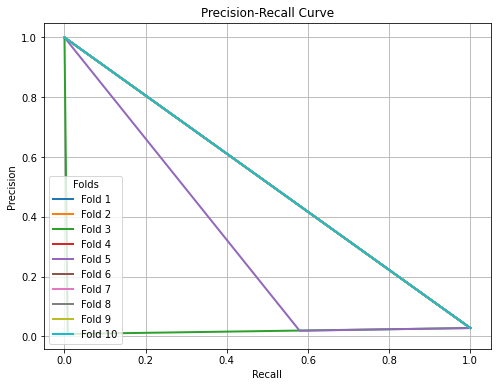

Average Test AUC: 0.48490420584369626


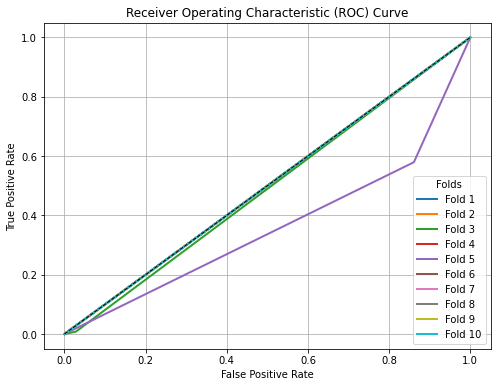

In [16]:
# Set the seed value
np.random.seed(42)

# Separate test races
test_races = shuffled_data['race_id'].unique()[:10]  # 10 test races
excluded_races = test_races.tolist()

# Train + test races from the dataset
train_data = shuffled_data[~shuffled_data['race_id'].isin(test_races)]
test_data = shuffled_data[shuffled_data['race_id'].isin(test_races)]

# Define the number of folds for cross-validation
n_folds = 10

# Initialize StratifiedKFold with the desired number of folds
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation results
test_accuracy_scores = []
test_precision_scores = []
test_recall_scores = []
test_f1_scores = []

# Initialize empty lists to store precision and recall values for each fold
precision_per_fold = []
recall_per_fold = []

auc_scores = []
roc_curves = []

# Define the FFNN model
ffnn_model = tf.keras.models.Sequential()
ffnn_model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(17,),
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.08, l2=0.0005)))
ffnn_model.add(tf.keras.layers.Dropout(0.2))  # Dropout layer for regularization
ffnn_model.add(tf.keras.layers.Dense(64, activation='relu',
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.08, l2=0.0005)))
ffnn_model.add(tf.keras.layers.Dropout(0.2))  # Dropout layer for regularization
ffnn_model.add(tf.keras.layers.Dense(64, activation='relu',
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.08, l2=0.0005)))
ffnn_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
ffnn_model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Iterate over the folds
for train_index, val_index in stratified_kfold.split(train_data, train_data['pitstop']):
    # Initialize the EarlyStopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    
    # Get the training and validation subsets for the current fold
    train_subset = train_data.iloc[train_index]
    val_subset = train_data.iloc[val_index]

    # Separate input features (X) and target variable (y)
    X_train = train_subset[['race_progress', 'tyreageprogress', 'is_leader', 'relativecompound', 'racetrackcat', 'fcystatus', 'remaining_pit_stops', 'pursuer_tyre_change', 'close_ahead']]
    y_train = train_subset['pitstop']

    X_val = val_subset[['race_progress', 'tyreageprogress', 'is_leader', 'relativecompound', 'racetrackcat', 'fcystatus', 'remaining_pit_stops', 'pursuer_tyre_change', 'close_ahead']]
    y_val = val_subset['pitstop']

    # Separate categorical and numerical features
    cat_features = ['is_leader', 'relativecompound', 'racetrackcat', 'fcystatus', 'remaining_pit_stops', 'pursuer_tyre_change', 'close_ahead']
    num_features = ['race_progress', 'tyreageprogress']

    # Perform preprocessing on numerical features
    scaler = StandardScaler()
    X_train.loc[:, num_features] = scaler.fit_transform(X_train[num_features])
    X_val.loc[:, num_features] = scaler.transform(X_val[num_features])

    # Perform preprocessing on categorical features
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    X_train_encoded = encoder.fit_transform(X_train[cat_features])
    X_val_encoded = encoder.transform(X_val[cat_features])

    # Combine preprocessed numerical and categorical features
    X_train_processed = np.concatenate((X_train_encoded, X_train[num_features]), axis=1)
    X_val_processed = np.concatenate((X_val_encoded, X_val[num_features]), axis=1)
    
    # Create an instance of LabelEncoder
    label_encoder = LabelEncoder()

    # Encode the categorical labels into integer values
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_val_encoded = label_encoder.transform(y_val)

    # Undersample the majority class
    majority_class_indices = np.where(y_train_encoded == 0)[0]
    minority_class_indices = np.where(y_train_encoded == 1)[0]
    undersampled_majority_indices = np.random.choice(majority_class_indices, size=len(minority_class_indices), replace=False)
    undersampled_indices = np.concatenate((undersampled_majority_indices, minority_class_indices))
    np.random.shuffle(undersampled_indices)

    X_train_processed_undersampled = X_train_processed[undersampled_indices]
    y_train_encoded_undersampled = y_train_encoded[undersampled_indices]

    # Define the class weights
    #class_weights = {0: 1, 1: 5}

    # Fit the model 
    history = ffnn_model.fit(X_train_processed_undersampled, y_train_encoded_undersampled,
                             validation_data=(X_val_processed, y_val_encoded),
                             batch_size=64, epochs=10, callbacks=[early_stopping],
                             #class_weight=class_weights, 
                             verbose=1)

#     # Evaluate on the validation set
#     val_loss, val_accuracy = ffnn_model.evaluate(X_val_processed, y_val_encoded, verbose=0)
#     print('Validation Loss:', val_loss)
    
    # Predict on the test data
    X_test = test_data[['race_progress', 'tyreageprogress', 'is_leader', 'relativecompound', 'racetrackcat', 'fcystatus', 'remaining_pit_stops', 'pursuer_tyre_change', 'close_ahead']]
    y_test = test_data['pitstop']
    X_test.loc[:, num_features] = scaler.transform(X_test[num_features])
    X_test_encoded = encoder.transform(X_test[cat_features])
    X_test_processed = np.concatenate((X_test_encoded, X_test[num_features]), axis=1)

    # Predict on the test data
    y_test_prob = ffnn_model.predict(X_test_processed)
    y_test_pred = (y_test_prob > 0.5).astype(int)  # Convert probabilities to class labels

    # Calculate evaluation metrics for the test data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=1)  # Set zero_division to 1
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Store evaluation metrics for the test data
    test_accuracy_scores.append(test_accuracy)
    test_precision_scores.append(test_precision)
    test_recall_scores.append(test_recall)
    test_f1_scores.append(test_f1)
    
    # Calculate precision and recall values for the fold
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
    precision_per_fold.append(precision)
    recall_per_fold.append(recall)
    
     # Calculate AUC for the test data
    test_auc = roc_auc_score(y_test, y_test_prob)
    auc_scores.append(test_auc)

    # Calculate ROC curve for the fold
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_curves.append((fpr, tpr))

# Calculate and print the average evaluation metrics for the test data
print('Average Test Accuracy:', np.mean(test_accuracy_scores))
print('Average Test Precision:', np.mean(test_precision_scores))
print('Average Test Recall:', np.mean(test_recall_scores))
print('Average Test F1 Score:', np.mean(test_f1_scores))

# Plot Precision-Recall curves for each fold
plt.figure(figsize=(8, 6))
for i in range(n_folds):
    plt.plot(recall_per_fold[i], precision_per_fold[i], lw=2, label=f'Fold {i+1}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(title='Folds', loc='lower left')
plt.grid(True)
plt.show()

# Calculate and print the average AUC score for the test data
print('Average Test AUC:', np.mean(auc_scores))

# Plot ROC curves for each fold
plt.figure(figsize=(8, 6))
for i in range(n_folds):
    fpr, tpr = roc_curves[i]
    plt.plot(fpr, tpr, lw=2, label=f'Fold {i+1}')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(title='Folds', loc='lower right')
plt.grid(True)
plt.show()

In [14]:
import optuna

# Define the objective function for Optuna
def objective(trial):
    # Set the seed value
    np.random.seed(42)

    # Define the number of folds for cross-validation
    n_folds = 10

    # Initialize StratifiedKFold with the desired number of folds
    stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Initialize lists to store evaluation results
    test_accuracy_scores = []
    test_precision_scores = []
    test_recall_scores = []
    test_f1_scores = []

    # Iterate over the folds
    for train_index, val_index in stratified_kfold.split(train_data, train_data['pitstop']):
        # Initialize the EarlyStopping callback
        early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

        # Get the training and validation subsets for the current fold
        train_subset = train_data.iloc[train_index]
        val_subset = train_data.iloc[val_index]

        # Separate input features (X) and target variable (y)
        X_train = train_subset[['race_progress', 'tyreageprogress', 'is_leader', 'relativecompound', 'racetrackcat', 'fcystatus', 'remaining_pit_stops', 'pursuer_tyre_change', 'close_ahead']]
        y_train = train_subset['pitstop']

        X_val = val_subset[['race_progress', 'tyreageprogress', 'is_leader', 'relativecompound', 'racetrackcat', 'fcystatus', 'remaining_pit_stops', 'pursuer_tyre_change', 'close_ahead']]
        y_val = val_subset['pitstop']

        # Separate categorical and numerical features
        cat_features = ['is_leader', 'relativecompound', 'racetrackcat', 'fcystatus', 'remaining_pit_stops', 'pursuer_tyre_change', 'close_ahead']
        num_features = ['race_progress', 'tyreageprogress']

        # Perform preprocessing on numerical features
        scaler = StandardScaler()
        X_train.loc[:, num_features] = scaler.fit_transform(X_train[num_features])
        X_val.loc[:, num_features] = scaler.transform(X_val[num_features])

        # Perform preprocessing on categorical features
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        X_train_encoded = encoder.fit_transform(X_train[cat_features])
        X_val_encoded = encoder.transform(X_val[cat_features])

        # Combine preprocessed numerical and categorical features
        X_train_processed = np.concatenate((X_train_encoded, X_train[num_features]), axis=1)
        X_val_processed = np.concatenate((X_val_encoded, X_val[num_features]), axis=1)

        # Create an instance of LabelEncoder
        label_encoder = LabelEncoder()

        # Encode the categorical labels into integer values
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_val_encoded = label_encoder.transform(y_val)

        # Undersample the majority class
        majority_class_indices = np.where(y_train_encoded == 0)[0]
        minority_class_indices = np.where(y_train_encoded == 1)[0]
        undersampled_majority_indices = np.random.choice(majority_class_indices, size=len(minority_class_indices), replace=False)
        undersampled_indices = np.concatenate((undersampled_majority_indices, minority_class_indices))
        np.random.shuffle(undersampled_indices)

        X_train_processed_undersampled = X_train_processed[undersampled_indices]
        y_train_encoded_undersampled = y_train_encoded[undersampled_indices]

        # Define the FFNN model
        ffnn_model = tf.keras.models.Sequential()
        ffnn_model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(17,),
                                              kernel_regularizer=tf.keras.regularizers.l1_l2(
                                                  l1=trial.suggest_float("l1", 0, 0.1),
                                                  l2=trial.suggest_float("l2", 0, 0.1))))
        ffnn_model.add(tf.keras.layers.Dropout(0.2))  # Dropout layer for regularization
        ffnn_model.add(tf.keras.layers.Dense(64, activation='relu',
                                              kernel_regularizer=tf.keras.regularizers.l1_l2(
                                                  l1=trial.suggest_float("l1", 0, 0.1),
                                                  l2=trial.suggest_float("l2", 0, 0.1))))
        ffnn_model.add(tf.keras.layers.Dropout(0.2))  # Dropout layer for regularization
        ffnn_model.add(tf.keras.layers.Dense(64, activation='relu',
                                              kernel_regularizer=tf.keras.regularizers.l1_l2(
                                                  l1=trial.suggest_float("l1", 0, 0.1),
                                                  l2=trial.suggest_float("l2", 0, 0.1))))
        ffnn_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Output layer

        # Compile the model
        ffnn_model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

        # Fit the model
        history = ffnn_model.fit(X_train_processed_undersampled, y_train_encoded_undersampled,
                                 validation_data=(X_val_processed, y_val_encoded),
                                 batch_size=64, epochs=10, callbacks=[early_stopping],
                                 verbose=1)

        # Evaluate on the validation set
        val_loss, val_accuracy = ffnn_model.evaluate(X_val_processed, y_val_encoded, verbose=0)
        print('Validation Loss:', val_loss)

        # Predict on the test data
        X_test = test_data[['race_progress', 'tyreageprogress', 'is_leader', 'relativecompound', 'racetrackcat', 'fcystatus', 'remaining_pit_stops', 'pursuer_tyre_change', 'close_ahead']]
        y_test = test_data['pitstop']
        X_test.loc[:, num_features] = scaler.transform(X_test[num_features])
        X_test_encoded = encoder.transform(X_test[cat_features])
        X_test_processed = np.concatenate((X_test_encoded, X_test[num_features]), axis=1)

        # Predict on the test data
        y_test_prob = ffnn_model.predict(X_test_processed)
        y_test_pred = (y_test_prob > 0.5).astype(int)  # Convert probabilities to class labels

        # Calculate evaluation metrics for the test data
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, zero_division=1)  # Set zero_division to 1
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)

        # Store evaluation metrics for the test data
        test_accuracy_scores.append(test_accuracy)
        test_precision_scores.append(test_precision)
        test_recall_scores.append(test_recall)
        test_f1_scores.append(test_f1)

    # Return the average F1 score as the objective value
    return np.mean(test_f1_scores)

# Create an Optuna study
study = optuna.create_study(direction='maximize')

# Start the hyperparameter search
study.optimize(objective, n_trials=50)

# Print the best hyperparameters and objective value
best_params = study.best_params
best_value = study.best_value
print('Best Hyperparameters:', best_params)
print('Best Objective Value:', best_value)

# Get the best model configuration
best_l1 = best_params['l1']
best_l2 = best_params['l2']

[I 2023-05-28 18:38:50,883] A new study created in memory with name: no-name-4446848a-e9ea-4a4b-b2c0-bfba6627091a
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 9ms/step - loss: 87.5889 - accuracy: 0.5691 - val_loss: 71.9277 - val_accuracy: 0.7759
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 59.2336 - accuracy: 0.7083 - val_loss: 46.2909 - val_accuracy: 0.9772
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 36.6554 - accuracy: 0.7631 - val_loss: 27.0544 - val_accuracy: 0.6869
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 20.1719 - accuracy: 0.6176 - val_loss: 13.5466 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 9.1605 - accuracy: 0.5110 - val_loss: 5.2205 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 3.1419 - accuracy: 0.4945 - val_loss: 1.6311 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 1.3081 - accuracy: 0.5000 - val_loss: 1.0464 - val_accuracy: 0.0273
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step
Epoch 1/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


38/38 [==============================] - 2s 10ms/step - loss: 85.8317 - accuracy: 0.5506 - val_loss: 70.1697 - val_accuracy: 0.4274
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 57.4868 - accuracy: 0.6969 - val_loss: 44.6437 - val_accuracy: 0.9232
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 35.0727 - accuracy: 0.7530 - val_loss: 25.6282 - val_accuracy: 0.2695
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 19.0120 - accuracy: 0.5270 - val_loss: 12.6899 - val_accuracy: 0.3193
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 8.5806 - accuracy: 0.5481 - val_loss: 4.8646 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 2.9037 - accuracy: 0.5000 - val_loss: 1.5300 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 1.2280 - accuracy: 0.5000 - val_loss: 1.0122 - val_accuracy: 0.9727
Epoch 8/10
38/38 [====

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 11ms/step - loss: 87.2671 - accuracy: 0.5691 - val_loss: 71.6309 - val_accuracy: 0.6765
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 58.9239 - accuracy: 0.6120 - val_loss: 46.0589 - val_accuracy: 0.7729
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 36.4312 - accuracy: 0.7266 - val_loss: 26.8727 - val_accuracy: 0.8911
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 20.0050 - accuracy: 0.6807 - val_loss: 13.3762 - val_accuracy: 0.0271
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 9.0190 - accuracy: 0.5046 - val_loss: 5.1612 - val_accuracy: 0.0271
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 3.1240 - accuracy: 0.5000 - val_loss: 1.6901 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 1.3380 - accuracy: 0.4806 - val_loss: 1.0618 - val_accuracy: 0.9729
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 10ms/step - loss: 87.7803 - accuracy: 0.5922 - val_loss: 72.0574 - val_accuracy: 0.9807
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 59.3323 - accuracy: 0.7797 - val_loss: 46.3978 - val_accuracy: 0.8795
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 36.7305 - accuracy: 0.7923 - val_loss: 27.1501 - val_accuracy: 0.1076
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 20.2415 - accuracy: 0.5733 - val_loss: 13.6250 - val_accuracy: 0.0271
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 9.2219 - accuracy: 0.5021 - val_loss: 5.2797 - val_accuracy: 0.0271
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 3.1465 - accuracy: 0.5000 - val_loss: 1.6266 - val_accuracy: 0.9729
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2924 - accuracy: 0.4933 - val_loss: 1.0252 - val_accuracy: 0.9729
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 4s 24ms/step - loss: 87.2284 - accuracy: 0.5974 - val_loss: 71.5624 - val_accuracy: 0.8296
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 58.8524 - accuracy: 0.7057 - val_loss: 45.9591 - val_accuracy: 0.8464
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 36.3320 - accuracy: 0.7631 - val_loss: 26.7856 - val_accuracy: 0.6216
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 19.9387 - accuracy: 0.7298 - val_loss: 13.3752 - val_accuracy: 0.4413
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 9.0666 - accuracy: 0.5645 - val_loss: 5.1207 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 3.0246 - accuracy: 0.4840 - val_loss: 1.5350 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2315 - accuracy: 0.4907 - val_loss: 1.0199 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 87.5263 - accuracy: 0.5008 - val_loss: 71.7965 - val_accuracy: 0.7924
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 59.0679 - accuracy: 0.6223 - val_loss: 46.0786 - val_accuracy: 0.9839
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 36.3767 - accuracy: 0.5978 - val_loss: 26.7346 - val_accuracy: 0.7969
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 19.8470 - accuracy: 0.6737 - val_loss: 13.2078 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 8.8795 - accuracy: 0.5067 - val_loss: 4.9786 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.9892 - accuracy: 0.4831 - val_loss: 1.5880 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2896 - accuracy: 0.5000 - val_loss: 1.0294 - val_accuracy: 0.9727
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 87.0507 - accuracy: 0.5426 - val_loss: 71.3763 - val_accuracy: 0.8640
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 58.7319 - accuracy: 0.6497 - val_loss: 45.8880 - val_accuracy: 0.8255
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 36.3103 - accuracy: 0.7622 - val_loss: 26.7549 - val_accuracy: 0.9905
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 19.9062 - accuracy: 0.6577 - val_loss: 13.2988 - val_accuracy: 0.9897
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 9.0018 - accuracy: 0.5388 - val_loss: 5.1254 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 3.0816 - accuracy: 0.4941 - val_loss: 1.6296 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2923 - accuracy: 0.4949 - val_loss: 1.0598 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 87.4869 - accuracy: 0.4380 - val_loss: 71.7649 - val_accuracy: 0.7533
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 59.0032 - accuracy: 0.5616 - val_loss: 46.0468 - val_accuracy: 0.8857
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 36.4081 - accuracy: 0.6320 - val_loss: 26.8171 - val_accuracy: 0.9729
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 19.9982 - accuracy: 0.5059 - val_loss: 13.3648 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 9.0182 - accuracy: 0.5021 - val_loss: 5.1058 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 3.0677 - accuracy: 0.4878 - val_loss: 1.5967 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2733 - accuracy: 0.5000 - val_loss: 1.0310 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 88.2189 - accuracy: 0.4275 - val_loss: 72.4407 - val_accuracy: 0.8621
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 59.6189 - accuracy: 0.6379 - val_loss: 46.5539 - val_accuracy: 0.8443
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 36.7684 - accuracy: 0.7804 - val_loss: 27.0506 - val_accuracy: 0.9797
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 20.1402 - accuracy: 0.5965 - val_loss: 13.4635 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 9.1190 - accuracy: 0.4903 - val_loss: 5.1655 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 3.0965 - accuracy: 0.5000 - val_loss: 1.5950 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2845 - accuracy: 0.4865 - val_loss: 1.0258 - val_accuracy: 0.9727
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 88.1277 - accuracy: 0.5489 - val_loss: 72.4642 - val_accuracy: 0.4626
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 59.6928 - accuracy: 0.6223 - val_loss: 46.7143 - val_accuracy: 0.7011
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 36.9906 - accuracy: 0.6944 - val_loss: 27.3328 - val_accuracy: 0.6659
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 20.3911 - accuracy: 0.6766 - val_loss: 13.6818 - val_accuracy: 0.5254
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 9.2538 - accuracy: 0.5215 - val_loss: 5.2426 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 3.1464 - accuracy: 0.4975 - val_loss: 1.6273 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2956 - accuracy: 0.5000 - val_loss: 1.0347 - val_accuracy: 0.9727
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


[I 2023-05-28 18:39:48,115] Trial 0 finished with value: 0.027108433734939753 and parameters: {'l1': 0.08787499119012264, 'l2': 0.06071225562617012}. Best is trial 0 with value: 0.027108433734939753.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_s

Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 56.8526 - accuracy: 0.5481 - val_loss: 46.5312 - val_accuracy: 0.6469
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 38.2488 - accuracy: 0.7255 - val_loss: 29.9058 - val_accuracy: 0.6024
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 23.6908 - accuracy: 0.7635 - val_loss: 17.5496 - val_accuracy: 0.5068
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 13.1616 - accuracy: 0.6328 - val_loss: 8.9637 - val_accuracy: 0.9766
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 6.2447 - accuracy: 0.5017 - val_loss: 3.7782 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.4278 - accuracy: 0.4920 - val_loss: 1.4045 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1212 - accuracy: 0.4916 - val_loss: 0.9513 - val_accuracy: 0.0273
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 56.6610 - accuracy: 0.5721 - val_loss: 46.3959 - val_accuracy: 0.7043
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 38.2203 - accuracy: 0.7142 - val_loss: 29.9856 - val_accuracy: 0.9706
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 23.8827 - accuracy: 0.7884 - val_loss: 17.8040 - val_accuracy: 0.7276
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 13.4219 - accuracy: 0.6669 - val_loss: 9.1944 - val_accuracy: 0.9903
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 6.4070 - accuracy: 0.5666 - val_loss: 3.8673 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5026 - accuracy: 0.5000 - val_loss: 1.4643 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1567 - accuracy: 0.5000 - val_loss: 0.9849 - val_accuracy: 0.0273
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 57.0276 - accuracy: 0.5122 - val_loss: 46.6843 - val_accuracy: 0.6769
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 38.4003 - accuracy: 0.6352 - val_loss: 30.0308 - val_accuracy: 0.9760
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 23.7954 - accuracy: 0.6925 - val_loss: 17.5884 - val_accuracy: 0.9741
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 13.2171 - accuracy: 0.6120 - val_loss: 9.0105 - val_accuracy: 0.9729
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 6.2839 - accuracy: 0.5000 - val_loss: 3.7924 - val_accuracy: 0.9729
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.4316 - accuracy: 0.4937 - val_loss: 1.3977 - val_accuracy: 0.9729
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1255 - accuracy: 0.4756 - val_loss: 0.9573 - val_accuracy: 0.0271
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 15ms/step - loss: 57.0088 - accuracy: 0.5442 - val_loss: 46.6822 - val_accuracy: 0.5781
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 38.3834 - accuracy: 0.6293 - val_loss: 29.9941 - val_accuracy: 0.8110
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 23.7627 - accuracy: 0.6950 - val_loss: 17.5693 - val_accuracy: 0.9714
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 13.2021 - accuracy: 0.5960 - val_loss: 8.9896 - val_accuracy: 0.5545
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 6.2391 - accuracy: 0.5771 - val_loss: 3.7709 - val_accuracy: 0.0271
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.4094 - accuracy: 0.5000 - val_loss: 1.3854 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1057 - accuracy: 0.4933 - val_loss: 0.9309 - val_accuracy: 0.9729
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 56.5827 - accuracy: 0.5784 - val_loss: 46.2776 - val_accuracy: 0.9598
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 38.0613 - accuracy: 0.7648 - val_loss: 29.7842 - val_accuracy: 0.5411
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 23.6228 - accuracy: 0.6771 - val_loss: 17.5389 - val_accuracy: 0.9928
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 13.2333 - accuracy: 0.7542 - val_loss: 9.0434 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 6.3306 - accuracy: 0.5000 - val_loss: 3.8156 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.4865 - accuracy: 0.5000 - val_loss: 1.4109 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1411 - accuracy: 0.5000 - val_loss: 0.9347 - val_accuracy: 0.9727
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 56.0282 - accuracy: 0.5864 - val_loss: 45.7688 - val_accuracy: 0.6910
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 37.6113 - accuracy: 0.7205 - val_loss: 29.4087 - val_accuracy: 0.6663
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 23.3260 - accuracy: 0.7614 - val_loss: 17.3062 - val_accuracy: 0.9567
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 13.0321 - accuracy: 0.6653 - val_loss: 8.9232 - val_accuracy: 0.1147
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 6.2106 - accuracy: 0.5586 - val_loss: 3.7575 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.4277 - accuracy: 0.4996 - val_loss: 1.3989 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.1316 - accuracy: 0.4916 - val_loss: 0.9581 - val_accuracy: 0.0273
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 57.0280 - accuracy: 0.4604 - val_loss: 46.6879 - val_accuracy: 0.6135
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 38.3907 - accuracy: 0.5940 - val_loss: 30.0003 - val_accuracy: 0.9493
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 23.8353 - accuracy: 0.6792 - val_loss: 17.6918 - val_accuracy: 0.9727
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 13.3746 - accuracy: 0.5025 - val_loss: 9.1851 - val_accuracy: 0.9820
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 6.4226 - accuracy: 0.5569 - val_loss: 3.9012 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.5192 - accuracy: 0.4903 - val_loss: 1.4649 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1555 - accuracy: 0.5000 - val_loss: 0.9604 - val_accuracy: 0.0273
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 56.5938 - accuracy: 0.4435 - val_loss: 46.3110 - val_accuracy: 0.3494
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 38.0503 - accuracy: 0.6248 - val_loss: 29.7610 - val_accuracy: 0.6148
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 23.6017 - accuracy: 0.6990 - val_loss: 17.4998 - val_accuracy: 0.9843
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 13.1408 - accuracy: 0.7521 - val_loss: 8.9587 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 6.2057 - accuracy: 0.5004 - val_loss: 3.7583 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.4018 - accuracy: 0.5000 - val_loss: 1.3866 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1061 - accuracy: 0.4890 - val_loss: 0.9566 - val_accuracy: 0.0273
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 56.8837 - accuracy: 0.5696 - val_loss: 46.6138 - val_accuracy: 0.5071
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 38.3273 - accuracy: 0.6716 - val_loss: 29.9490 - val_accuracy: 0.9592
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 23.7995 - accuracy: 0.6809 - val_loss: 17.6967 - val_accuracy: 0.9826
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 13.4006 - accuracy: 0.6678 - val_loss: 9.2365 - val_accuracy: 0.3014
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 6.4532 - accuracy: 0.5291 - val_loss: 3.9115 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5197 - accuracy: 0.4852 - val_loss: 1.4367 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1533 - accuracy: 0.5000 - val_loss: 0.9511 - val_accuracy: 0.9727
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 57.0761 - accuracy: 0.5055 - val_loss: 46.7542 - val_accuracy: 0.4012
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 38.4559 - accuracy: 0.6062 - val_loss: 30.0927 - val_accuracy: 0.5239
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 23.8757 - accuracy: 0.6564 - val_loss: 17.7408 - val_accuracy: 0.6131
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 13.3707 - accuracy: 0.6193 - val_loss: 9.1665 - val_accuracy: 0.9756
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 6.4132 - accuracy: 0.5401 - val_loss: 3.8984 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5259 - accuracy: 0.5000 - val_loss: 1.4273 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1515 - accuracy: 0.5000 - val_loss: 0.9557 - val_accuracy: 0.9727
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 18:40:50,117] Trial 1 finished with value: 0.037951807228915654 and parameters: {'l1': 0.054501027980832444, 'l2': 0.058256383732153666}. Best is trial 1 with value: 0.037951807228915654.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem

Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 62.6283 - accuracy: 0.6071 - val_loss: 51.2548 - val_accuracy: 0.6368
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 42.1098 - accuracy: 0.7184 - val_loss: 32.8533 - val_accuracy: 0.9679
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 26.0674 - accuracy: 0.6223 - val_loss: 19.3236 - val_accuracy: 0.9087
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 14.5065 - accuracy: 0.7133 - val_loss: 9.8695 - val_accuracy: 0.9131
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 6.8237 - accuracy: 0.5354 - val_loss: 4.0645 - val_accuracy: 0.3452
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.5670 - accuracy: 0.4962 - val_loss: 1.4438 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.1543 - accuracy: 0.4996 - val_loss: 0.9618 - val_accuracy: 0.9727
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 27ms/step - loss: 62.6035 - accuracy: 0.4203 - val_loss: 51.2261 - val_accuracy: 0.5132
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 42.1164 - accuracy: 0.5164 - val_loss: 32.9037 - val_accuracy: 0.9762
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 26.1404 - accuracy: 0.6214 - val_loss: 19.4273 - val_accuracy: 0.9671
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 14.6595 - accuracy: 0.7015 - val_loss: 10.0442 - val_accuracy: 0.2003
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 6.9803 - accuracy: 0.5291 - val_loss: 4.1933 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6288 - accuracy: 0.4996 - val_loss: 1.4623 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1634 - accuracy: 0.5000 - val_loss: 0.9748 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 63.6333 - accuracy: 0.6091 - val_loss: 52.2494 - val_accuracy: 0.4838
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 43.0322 - accuracy: 0.7178 - val_loss: 33.7344 - val_accuracy: 0.9267
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 26.7871 - accuracy: 0.7675 - val_loss: 19.8600 - val_accuracy: 0.9729
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 14.9490 - accuracy: 0.5093 - val_loss: 10.1502 - val_accuracy: 0.9729
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 7.0312 - accuracy: 0.5055 - val_loss: 4.1636 - val_accuracy: 0.9729
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.6388 - accuracy: 0.5000 - val_loss: 1.4603 - val_accuracy: 0.9729
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1701 - accuracy: 0.4781 - val_loss: 0.9747 - val_accuracy: 0.9729
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 62.3441 - accuracy: 0.5303 - val_loss: 50.9814 - val_accuracy: 0.8497
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 41.8813 - accuracy: 0.6567 - val_loss: 32.6617 - val_accuracy: 0.9770
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 25.8740 - accuracy: 0.6196 - val_loss: 19.1031 - val_accuracy: 0.9729
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 14.3591 - accuracy: 0.5244 - val_loss: 9.7791 - val_accuracy: 0.9139
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 6.7675 - accuracy: 0.5409 - val_loss: 4.0473 - val_accuracy: 0.0271
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5438 - accuracy: 0.4962 - val_loss: 1.4277 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1465 - accuracy: 0.5000 - val_loss: 0.9640 - val_accuracy: 0.9729
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 63.0521 - accuracy: 0.5072 - val_loss: 51.6714 - val_accuracy: 0.4746
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 42.5288 - accuracy: 0.6522 - val_loss: 33.2913 - val_accuracy: 0.9611
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 26.4909 - accuracy: 0.6290 - val_loss: 19.6974 - val_accuracy: 0.9733
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 14.8676 - accuracy: 0.5308 - val_loss: 10.1338 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 7.0363 - accuracy: 0.5008 - val_loss: 4.1918 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.6649 - accuracy: 0.4911 - val_loss: 1.4884 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1757 - accuracy: 0.4709 - val_loss: 0.9810 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 62.4299 - accuracy: 0.5519 - val_loss: 51.0907 - val_accuracy: 0.3726
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 41.9228 - accuracy: 0.6661 - val_loss: 32.7157 - val_accuracy: 0.5568
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 25.8961 - accuracy: 0.7428 - val_loss: 19.1597 - val_accuracy: 0.9818
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 14.4156 - accuracy: 0.5506 - val_loss: 9.8318 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 6.7991 - accuracy: 0.5384 - val_loss: 4.0112 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5266 - accuracy: 0.5000 - val_loss: 1.3902 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1191 - accuracy: 0.4890 - val_loss: 0.9594 - val_accuracy: 0.0273
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 62.6007 - accuracy: 0.5185 - val_loss: 51.2106 - val_accuracy: 0.6891
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 42.0846 - accuracy: 0.6825 - val_loss: 32.9116 - val_accuracy: 0.3295
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 26.0599 - accuracy: 0.7239 - val_loss: 19.3136 - val_accuracy: 0.9936
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 14.5232 - accuracy: 0.6653 - val_loss: 9.9002 - val_accuracy: 0.1604
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 6.8138 - accuracy: 0.5228 - val_loss: 4.0316 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.5440 - accuracy: 0.5000 - val_loss: 1.4230 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1514 - accuracy: 0.4886 - val_loss: 0.9810 - val_accuracy: 0.0273
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 62.9054 - accuracy: 0.5046 - val_loss: 51.5436 - val_accuracy: 0.5365
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 42.4023 - accuracy: 0.6294 - val_loss: 33.1351 - val_accuracy: 0.8980
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 26.2676 - accuracy: 0.6573 - val_loss: 19.4260 - val_accuracy: 0.9632
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 14.5926 - accuracy: 0.5367 - val_loss: 9.9196 - val_accuracy: 0.9714
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 6.8909 - accuracy: 0.5021 - val_loss: 4.1288 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6032 - accuracy: 0.5004 - val_loss: 1.4531 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.1601 - accuracy: 0.4966 - val_loss: 0.9770 - val_accuracy: 0.0273
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 62.7377 - accuracy: 0.5371 - val_loss: 51.3837 - val_accuracy: 0.7760
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 42.2558 - accuracy: 0.5991 - val_loss: 32.9993 - val_accuracy: 0.7642
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 26.1615 - accuracy: 0.6981 - val_loss: 19.3834 - val_accuracy: 0.7872
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 14.5701 - accuracy: 0.6695 - val_loss: 9.9441 - val_accuracy: 0.9083
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 6.8888 - accuracy: 0.5607 - val_loss: 4.0971 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6078 - accuracy: 0.5000 - val_loss: 1.4584 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1734 - accuracy: 0.5000 - val_loss: 0.9767 - val_accuracy: 0.9727
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 29ms/step - loss: 62.1090 - accuracy: 0.5712 - val_loss: 50.7752 - val_accuracy: 0.8317
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 41.7414 - accuracy: 0.6657 - val_loss: 32.6160 - val_accuracy: 0.6837
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 25.8208 - accuracy: 0.7428 - val_loss: 19.0739 - val_accuracy: 0.9878
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 14.2956 - accuracy: 0.7074 - val_loss: 9.7163 - val_accuracy: 0.9783
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 6.7287 - accuracy: 0.5164 - val_loss: 4.0305 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5481 - accuracy: 0.5000 - val_loss: 1.4432 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1440 - accuracy: 0.4848 - val_loss: 0.9625 - val_accuracy: 0.0273
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 18:41:53,624] Trial 2 finished with value: 0.021686746987951804 and parameters: {'l1': 0.06069960679372356, 'l2': 0.060387567025535806}. Best is trial 1 with value: 0.037951807228915654.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_

Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 63.4378 - accuracy: 0.5320 - val_loss: 51.8160 - val_accuracy: 0.6680
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 42.5314 - accuracy: 0.7323 - val_loss: 33.1887 - val_accuracy: 0.9932
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 26.3307 - accuracy: 0.7770 - val_loss: 19.5349 - val_accuracy: 0.9901
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 14.7221 - accuracy: 0.6311 - val_loss: 10.0605 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 7.0059 - accuracy: 0.5396 - val_loss: 4.1974 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6716 - accuracy: 0.5000 - val_loss: 1.4769 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1544 - accuracy: 0.5000 - val_loss: 0.9771 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 64.6435 - accuracy: 0.4283 - val_loss: 52.9791 - val_accuracy: 0.3736
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 43.6447 - accuracy: 0.5476 - val_loss: 34.2285 - val_accuracy: 0.2657
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 27.2303 - accuracy: 0.6450 - val_loss: 20.3078 - val_accuracy: 0.7668
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 15.3590 - accuracy: 0.6573 - val_loss: 10.5672 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 7.3954 - accuracy: 0.5051 - val_loss: 4.4494 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.8148 - accuracy: 0.5000 - val_loss: 1.5147 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1799 - accuracy: 0.4933 - val_loss: 0.9762 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 62.9334 - accuracy: 0.6226 - val_loss: 51.3380 - val_accuracy: 0.8717
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 42.1056 - accuracy: 0.7515 - val_loss: 32.8065 - val_accuracy: 0.9818
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 25.9611 - accuracy: 0.8117 - val_loss: 19.2041 - val_accuracy: 0.9928
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 14.4470 - accuracy: 0.7035 - val_loss: 9.8553 - val_accuracy: 0.9870
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 6.8451 - accuracy: 0.5556 - val_loss: 4.1270 - val_accuracy: 0.0271
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5912 - accuracy: 0.4962 - val_loss: 1.4431 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1283 - accuracy: 0.5000 - val_loss: 0.9613 - val_accuracy: 0.0271
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 64.0003 - accuracy: 0.5775 - val_loss: 52.4804 - val_accuracy: 0.1921
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 43.1316 - accuracy: 0.6584 - val_loss: 33.7535 - val_accuracy: 0.9596
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 26.8373 - accuracy: 0.6508 - val_loss: 19.9802 - val_accuracy: 0.9750
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 15.1400 - accuracy: 0.6104 - val_loss: 10.4654 - val_accuracy: 0.9810
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 7.3613 - accuracy: 0.5497 - val_loss: 4.5185 - val_accuracy: 0.0271
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.8839 - accuracy: 0.4949 - val_loss: 1.6395 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.2422 - accuracy: 0.5000 - val_loss: 1.0036 - val_accuracy: 0.9729
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 63.7120 - accuracy: 0.4490 - val_loss: 52.0905 - val_accuracy: 0.5543
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 42.8055 - accuracy: 0.5691 - val_loss: 33.4264 - val_accuracy: 0.9271
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 26.5299 - accuracy: 0.6526 - val_loss: 19.6938 - val_accuracy: 0.9731
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 14.8657 - accuracy: 0.5181 - val_loss: 10.1956 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 7.1344 - accuracy: 0.5000 - val_loss: 4.3318 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.7755 - accuracy: 0.4928 - val_loss: 1.5667 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2248 - accuracy: 0.4810 - val_loss: 1.0101 - val_accuracy: 0.9727
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 64.1154 - accuracy: 0.5776 - val_loss: 52.4644 - val_accuracy: 0.3997
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 43.1020 - accuracy: 0.6834 - val_loss: 33.6888 - val_accuracy: 0.4585
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 26.6888 - accuracy: 0.7702 - val_loss: 19.7880 - val_accuracy: 0.9936
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 14.8966 - accuracy: 0.6113 - val_loss: 10.1960 - val_accuracy: 0.9822
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 7.1224 - accuracy: 0.5312 - val_loss: 4.3221 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.7597 - accuracy: 0.5000 - val_loss: 1.5533 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1952 - accuracy: 0.5000 - val_loss: 0.9943 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 64.1656 - accuracy: 0.4545 - val_loss: 52.5293 - val_accuracy: 0.7249
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 43.1891 - accuracy: 0.6071 - val_loss: 33.7582 - val_accuracy: 0.4616
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 26.7614 - accuracy: 0.6290 - val_loss: 19.8359 - val_accuracy: 0.8410
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 14.9304 - accuracy: 0.7184 - val_loss: 10.2168 - val_accuracy: 0.0366
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 7.0945 - accuracy: 0.5169 - val_loss: 4.2509 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.7057 - accuracy: 0.5000 - val_loss: 1.5007 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.1721 - accuracy: 0.4992 - val_loss: 0.9792 - val_accuracy: 0.9727
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 13ms/step - loss: 64.1716 - accuracy: 0.4945 - val_loss: 52.5233 - val_accuracy: 0.3511
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 43.1901 - accuracy: 0.5502 - val_loss: 33.7866 - val_accuracy: 0.9075
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 26.8451 - accuracy: 0.6939 - val_loss: 19.9637 - val_accuracy: 0.9559
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 15.0594 - accuracy: 0.6033 - val_loss: 10.3323 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 7.2124 - accuracy: 0.5122 - val_loss: 4.3584 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.8014 - accuracy: 0.5000 - val_loss: 1.5719 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2185 - accuracy: 0.4966 - val_loss: 1.0069 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 13ms/step - loss: 63.7805 - accuracy: 0.6446 - val_loss: 52.1753 - val_accuracy: 0.6502
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 42.8718 - accuracy: 0.6859 - val_loss: 33.5014 - val_accuracy: 0.7493
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 26.5661 - accuracy: 0.7728 - val_loss: 19.7140 - val_accuracy: 0.9870
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 14.8902 - accuracy: 0.6513 - val_loss: 10.2275 - val_accuracy: 0.9770
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 7.1278 - accuracy: 0.5809 - val_loss: 4.3053 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.7209 - accuracy: 0.5000 - val_loss: 1.5062 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.1850 - accuracy: 0.5000 - val_loss: 0.9847 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 13ms/step - loss: 63.2869 - accuracy: 0.5987 - val_loss: 51.7003 - val_accuracy: 0.8363
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 42.4737 - accuracy: 0.6939 - val_loss: 33.1579 - val_accuracy: 0.8830
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 26.3112 - accuracy: 0.7424 - val_loss: 19.5623 - val_accuracy: 0.2478
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 14.7445 - accuracy: 0.6484 - val_loss: 10.1287 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 7.0550 - accuracy: 0.5337 - val_loss: 4.2619 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.7173 - accuracy: 0.4979 - val_loss: 1.5534 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2000 - accuracy: 0.4916 - val_loss: 0.9919 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 18:42:56,378] Trial 3 finished with value: 0.027108433734939756 and parameters: {'l1': 0.060417440676121426, 'l2': 0.07053589519758262}. Best is trial 1 with value: 0.037951807228915654.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_

Epoch 1/10
38/38 [==============================] - 2s 13ms/step - loss: 43.8268 - accuracy: 0.5481 - val_loss: 36.0699 - val_accuracy: 0.3315
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 29.6972 - accuracy: 0.6497 - val_loss: 23.2619 - val_accuracy: 0.5737
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 18.4120 - accuracy: 0.6758 - val_loss: 13.5809 - val_accuracy: 0.6935
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 10.1266 - accuracy: 0.6526 - val_loss: 6.7794 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 4.6275 - accuracy: 0.4890 - val_loss: 2.6904 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.7444 - accuracy: 0.5000 - val_loss: 1.1065 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 0.9686 - accuracy: 0.4975 - val_loss: 0.8584 - val_accuracy: 0.0273
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 12ms/step - loss: 44.4331 - accuracy: 0.5181 - val_loss: 36.5854 - val_accuracy: 0.6513
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 30.2056 - accuracy: 0.7074 - val_loss: 23.7087 - val_accuracy: 0.9131
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 18.8372 - accuracy: 0.7260 - val_loss: 13.9678 - val_accuracy: 0.9981
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 10.4646 - accuracy: 0.8002 - val_loss: 7.0548 - val_accuracy: 0.3682
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 4.8072 - accuracy: 0.5616 - val_loss: 2.7947 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 1.8008 - accuracy: 0.5000 - val_loss: 1.1327 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9866 - accuracy: 0.4941 - val_loss: 0.8575 - val_accuracy: 0.9727
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 13ms/step - loss: 44.1059 - accuracy: 0.5720 - val_loss: 36.3380 - val_accuracy: 0.4107
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 29.9326 - accuracy: 0.7085 - val_loss: 23.4349 - val_accuracy: 0.9994
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 18.5667 - accuracy: 0.8020 - val_loss: 13.6986 - val_accuracy: 0.9998
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 10.2042 - accuracy: 0.7932 - val_loss: 6.8339 - val_accuracy: 0.9729
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 4.6613 - accuracy: 0.5366 - val_loss: 2.7094 - val_accuracy: 0.9729
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 1.7545 - accuracy: 0.5000 - val_loss: 1.1111 - val_accuracy: 0.9729
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 0.9699 - accuracy: 0.4789 - val_loss: 0.8409 - val_accuracy: 0.9729
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 13ms/step - loss: 44.8132 - accuracy: 0.4722 - val_loss: 36.9518 - val_accuracy: 0.2558
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 30.4831 - accuracy: 0.5674 - val_loss: 23.9105 - val_accuracy: 0.9685
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 18.9636 - accuracy: 0.6757 - val_loss: 14.0127 - val_accuracy: 0.9878
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 10.4782 - accuracy: 0.5716 - val_loss: 7.0514 - val_accuracy: 0.2078
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 4.7805 - accuracy: 0.5143 - val_loss: 2.7544 - val_accuracy: 0.9729
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 1.7507 - accuracy: 0.5000 - val_loss: 1.1037 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.9596 - accuracy: 0.4958 - val_loss: 0.8563 - val_accuracy: 0.0271
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 15ms/step - loss: 44.3696 - accuracy: 0.6041 - val_loss: 36.5140 - val_accuracy: 0.7671
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 30.1025 - accuracy: 0.7272 - val_loss: 23.5805 - val_accuracy: 0.9207
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 18.7037 - accuracy: 0.7028 - val_loss: 13.8244 - val_accuracy: 0.9758
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 10.3693 - accuracy: 0.5582 - val_loss: 6.9953 - val_accuracy: 0.9731
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 4.7826 - accuracy: 0.5143 - val_loss: 2.7945 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.7992 - accuracy: 0.4975 - val_loss: 1.1373 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 0.9823 - accuracy: 0.4882 - val_loss: 0.8488 - val_accuracy: 0.9727
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 44.6587 - accuracy: 0.5093 - val_loss: 36.8357 - val_accuracy: 0.3656
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 30.4036 - accuracy: 0.6332 - val_loss: 23.8885 - val_accuracy: 0.7433
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 18.9314 - accuracy: 0.7673 - val_loss: 13.9733 - val_accuracy: 0.9876
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 10.4291 - accuracy: 0.6834 - val_loss: 7.0272 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 4.7868 - accuracy: 0.5042 - val_loss: 2.7864 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.7983 - accuracy: 0.5004 - val_loss: 1.1252 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 0.9814 - accuracy: 0.5000 - val_loss: 0.8436 - val_accuracy: 0.9727
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 44.4327 - accuracy: 0.4132 - val_loss: 36.5818 - val_accuracy: 0.5053
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 30.1854 - accuracy: 0.5898 - val_loss: 23.7069 - val_accuracy: 0.0418
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 18.7850 - accuracy: 0.5721 - val_loss: 13.9256 - val_accuracy: 0.0273
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 10.3741 - accuracy: 0.5438 - val_loss: 6.9837 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 4.7440 - accuracy: 0.5253 - val_loss: 2.7792 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.7809 - accuracy: 0.5000 - val_loss: 1.1309 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9757 - accuracy: 0.4890 - val_loss: 0.8461 - val_accuracy: 0.9727
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 44.5187 - accuracy: 0.5384 - val_loss: 36.6389 - val_accuracy: 0.8922
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 30.2588 - accuracy: 0.5375 - val_loss: 23.7070 - val_accuracy: 0.9066
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 18.7777 - accuracy: 0.7099 - val_loss: 13.8457 - val_accuracy: 0.9760
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 10.3437 - accuracy: 0.7196 - val_loss: 6.9749 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 4.7755 - accuracy: 0.5046 - val_loss: 2.7793 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.7826 - accuracy: 0.4865 - val_loss: 1.1311 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 0.9757 - accuracy: 0.5000 - val_loss: 0.8475 - val_accuracy: 0.9727
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 12ms/step - loss: 44.6341 - accuracy: 0.5223 - val_loss: 36.7516 - val_accuracy: 0.6614
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 30.3092 - accuracy: 0.6796 - val_loss: 23.7463 - val_accuracy: 0.9518
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 18.8338 - accuracy: 0.7441 - val_loss: 13.9209 - val_accuracy: 0.9812
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 10.4254 - accuracy: 0.7019 - val_loss: 6.9999 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 4.7747 - accuracy: 0.4966 - val_loss: 2.7596 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 1.7560 - accuracy: 0.4895 - val_loss: 1.1155 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9626 - accuracy: 0.5000 - val_loss: 0.8505 - val_accuracy: 0.9727
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 4s 29ms/step - loss: 44.6722 - accuracy: 0.5000 - val_loss: 36.8716 - val_accuracy: 0.1470
Epoch 2/10
38/38 [==============================] - 0s 12ms/step - loss: 30.4405 - accuracy: 0.5987 - val_loss: 23.9189 - val_accuracy: 0.8799
Epoch 3/10
38/38 [==============================] - 0s 10ms/step - loss: 19.0121 - accuracy: 0.6117 - val_loss: 14.0823 - val_accuracy: 0.9598
Epoch 4/10
38/38 [==============================] - 0s 11ms/step - loss: 10.5518 - accuracy: 0.5304 - val_loss: 7.1196 - val_accuracy: 0.7847
Epoch 5/10
38/38 [==============================] - 0s 12ms/step - loss: 4.8696 - accuracy: 0.5266 - val_loss: 2.8414 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 12ms/step - loss: 1.8204 - accuracy: 0.4933 - val_loss: 1.1484 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 12ms/step - loss: 0.9863 - accuracy: 0.5000 - val_loss: 0.8745 - val_accuracy: 0.0273
Epoch 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 18:44:01,051] Trial 4 finished with value: 0.0325301204819277 and parameters: {'l1': 0.045716017615838635, 'l2': 0.020857588460392196}. Best is trial 1 with value: 0.037951807228915654.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_s

Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 87.2208 - accuracy: 0.4975 - val_loss: 71.8923 - val_accuracy: 0.6525
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 59.2678 - accuracy: 0.6404 - val_loss: 46.3691 - val_accuracy: 0.1625
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 36.5463 - accuracy: 0.5514 - val_loss: 26.7803 - val_accuracy: 0.0273
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 19.6571 - accuracy: 0.5173 - val_loss: 12.7936 - val_accuracy: 0.0331
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 8.3435 - accuracy: 0.5008 - val_loss: 4.4207 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5852 - accuracy: 0.4928 - val_loss: 1.4605 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.1929 - accuracy: 0.4857 - val_loss: 0.9877 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 18ms/step - loss: 86.5611 - accuracy: 0.5949 - val_loss: 71.2480 - val_accuracy: 0.8980
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 58.6660 - accuracy: 0.7530 - val_loss: 45.7466 - val_accuracy: 0.5923
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 35.9057 - accuracy: 0.7272 - val_loss: 26.1476 - val_accuracy: 0.2802
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 19.1567 - accuracy: 0.6235 - val_loss: 12.4619 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 8.1167 - accuracy: 0.5089 - val_loss: 4.3300 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5549 - accuracy: 0.4890 - val_loss: 1.4756 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2012 - accuracy: 0.4798 - val_loss: 1.0030 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 11ms/step - loss: 85.9322 - accuracy: 0.5750 - val_loss: 70.7557 - val_accuracy: 0.7431
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 58.2357 - accuracy: 0.7363 - val_loss: 45.4796 - val_accuracy: 0.8398
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 35.7723 - accuracy: 0.8012 - val_loss: 26.0534 - val_accuracy: 0.9828
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 19.0506 - accuracy: 0.7102 - val_loss: 12.3358 - val_accuracy: 0.9729
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 8.0256 - accuracy: 0.5076 - val_loss: 4.2028 - val_accuracy: 0.9729
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.4377 - accuracy: 0.4920 - val_loss: 1.3754 - val_accuracy: 0.9729
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.1449 - accuracy: 0.4773 - val_loss: 0.9642 - val_accuracy: 0.9729
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 86.2375 - accuracy: 0.5240 - val_loss: 71.0132 - val_accuracy: 0.3635
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 58.4060 - accuracy: 0.6415 - val_loss: 45.5880 - val_accuracy: 0.5961
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 35.8744 - accuracy: 0.7022 - val_loss: 26.1899 - val_accuracy: 0.2703
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 19.2448 - accuracy: 0.6238 - val_loss: 12.6012 - val_accuracy: 0.0271
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 8.2738 - accuracy: 0.5013 - val_loss: 4.4650 - val_accuracy: 0.0271
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 2.6245 - accuracy: 0.4945 - val_loss: 1.5084 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.2151 - accuracy: 0.4937 - val_loss: 0.9978 - val_accuracy: 0.0271
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 12ms/step - loss: 86.7291 - accuracy: 0.6008 - val_loss: 71.4852 - val_accuracy: 0.6852
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 58.9203 - accuracy: 0.8381 - val_loss: 46.1200 - val_accuracy: 0.9857
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 36.4189 - accuracy: 0.8128 - val_loss: 26.7045 - val_accuracy: 0.9820
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 19.7469 - accuracy: 0.5523 - val_loss: 13.0057 - val_accuracy: 0.1488
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 8.5830 - accuracy: 0.5046 - val_loss: 4.5906 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 2.6659 - accuracy: 0.5000 - val_loss: 1.4908 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 1.2182 - accuracy: 0.5000 - val_loss: 0.9883 - val_accuracy: 0.9727
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step
Epoch 1/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


38/38 [==============================] - 2s 12ms/step - loss: 86.8579 - accuracy: 0.5645 - val_loss: 71.5790 - val_accuracy: 0.6456
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 58.9942 - accuracy: 0.6914 - val_loss: 46.1370 - val_accuracy: 0.5982
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 36.3564 - accuracy: 0.6918 - val_loss: 26.5969 - val_accuracy: 0.0273
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 19.5066 - accuracy: 0.5076 - val_loss: 12.7041 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 8.2548 - accuracy: 0.5097 - val_loss: 4.3298 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 2.5120 - accuracy: 0.4928 - val_loss: 1.4277 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.1735 - accuracy: 0.5000 - val_loss: 0.9850 - val_accuracy: 0.0273
Epoch 8/10
38/38 [====

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 86.1467 - accuracy: 0.4987 - val_loss: 70.9682 - val_accuracy: 0.5167
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 58.5559 - accuracy: 0.5704 - val_loss: 45.9052 - val_accuracy: 0.0617
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 36.2280 - accuracy: 0.5776 - val_loss: 26.5731 - val_accuracy: 0.6077
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 19.5765 - accuracy: 0.6029 - val_loss: 12.8235 - val_accuracy: 0.0789
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 8.4338 - accuracy: 0.5329 - val_loss: 4.5044 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.6505 - accuracy: 0.5000 - val_loss: 1.5228 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2354 - accuracy: 0.5000 - val_loss: 1.0181 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 86.6650 - accuracy: 0.4760 - val_loss: 71.3841 - val_accuracy: 0.2749
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 58.8147 - accuracy: 0.5489 - val_loss: 45.9854 - val_accuracy: 0.3082
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 36.2267 - accuracy: 0.6606 - val_loss: 26.4575 - val_accuracy: 0.9727
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 19.4380 - accuracy: 0.5030 - val_loss: 12.6389 - val_accuracy: 0.1488
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 8.2051 - accuracy: 0.5042 - val_loss: 4.3327 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.5298 - accuracy: 0.5000 - val_loss: 1.4574 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.1949 - accuracy: 0.4924 - val_loss: 0.9904 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 86.6341 - accuracy: 0.4035 - val_loss: 71.3485 - val_accuracy: 0.2954
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 58.7616 - accuracy: 0.5944 - val_loss: 45.8943 - val_accuracy: 0.9582
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 36.1828 - accuracy: 0.7192 - val_loss: 26.4936 - val_accuracy: 0.9727
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 19.5386 - accuracy: 0.5527 - val_loss: 12.7910 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 8.4311 - accuracy: 0.5000 - val_loss: 4.5387 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6376 - accuracy: 0.5000 - val_loss: 1.4825 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.2023 - accuracy: 0.5000 - val_loss: 0.9834 - val_accuracy: 0.9727
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 17ms/step - loss: 85.9381 - accuracy: 0.5219 - val_loss: 70.7072 - val_accuracy: 0.7715
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 58.2152 - accuracy: 0.5987 - val_loss: 45.4244 - val_accuracy: 0.9538
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 35.7846 - accuracy: 0.6024 - val_loss: 26.1028 - val_accuracy: 0.9826
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 19.2014 - accuracy: 0.6421 - val_loss: 12.5513 - val_accuracy: 0.1753
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 8.2117 - accuracy: 0.5375 - val_loss: 4.3812 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5317 - accuracy: 0.4954 - val_loss: 1.4261 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1579 - accuracy: 0.5000 - val_loss: 0.9857 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


[I 2023-05-28 18:45:01,899] Trial 5 finished with value: 0.027108433734939756 and parameters: {'l1': 0.09217111538343901, 'l2': 0.02379171084817008}. Best is trial 1 with value: 0.037951807228915654.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_s

Epoch 1/10
38/38 [==============================] - 2s 13ms/step - loss: 83.6964 - accuracy: 0.5885 - val_loss: 68.5937 - val_accuracy: 0.9772
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 56.4185 - accuracy: 0.7171 - val_loss: 44.0270 - val_accuracy: 0.7746
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 34.8149 - accuracy: 0.7247 - val_loss: 25.6674 - val_accuracy: 0.3924
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 19.1115 - accuracy: 0.6965 - val_loss: 12.8006 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 8.6203 - accuracy: 0.5021 - val_loss: 4.8549 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.8875 - accuracy: 0.5000 - val_loss: 1.5320 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2269 - accuracy: 0.5000 - val_loss: 1.0234 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 83.5746 - accuracy: 0.5839 - val_loss: 68.5125 - val_accuracy: 0.4787
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 56.2828 - accuracy: 0.6657 - val_loss: 43.9084 - val_accuracy: 0.9621
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 34.6827 - accuracy: 0.7399 - val_loss: 25.4775 - val_accuracy: 0.9772
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 18.8840 - accuracy: 0.6935 - val_loss: 12.5387 - val_accuracy: 0.9754
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 8.4470 - accuracy: 0.5282 - val_loss: 4.7272 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.8357 - accuracy: 0.5000 - val_loss: 1.4908 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2201 - accuracy: 0.4764 - val_loss: 1.0143 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 13ms/step - loss: 84.4286 - accuracy: 0.5021 - val_loss: 69.2643 - val_accuracy: 0.4657
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 56.9107 - accuracy: 0.5737 - val_loss: 44.3885 - val_accuracy: 0.9810
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 35.0864 - accuracy: 0.6799 - val_loss: 25.8336 - val_accuracy: 0.8272
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 19.1838 - accuracy: 0.6302 - val_loss: 12.7938 - val_accuracy: 0.0271
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 8.6026 - accuracy: 0.5307 - val_loss: 4.8806 - val_accuracy: 0.0271
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.9441 - accuracy: 0.5000 - val_loss: 1.6124 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2737 - accuracy: 0.5000 - val_loss: 1.0328 - val_accuracy: 0.0271
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 83.2401 - accuracy: 0.6150 - val_loss: 68.2555 - val_accuracy: 0.5995
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 56.0402 - accuracy: 0.7789 - val_loss: 43.6919 - val_accuracy: 0.8152
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 34.4475 - accuracy: 0.7940 - val_loss: 25.2818 - val_accuracy: 0.9292
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 18.7527 - accuracy: 0.7329 - val_loss: 12.4714 - val_accuracy: 0.9729
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 8.3656 - accuracy: 0.5042 - val_loss: 4.6670 - val_accuracy: 0.9729
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.7954 - accuracy: 0.4954 - val_loss: 1.4947 - val_accuracy: 0.9729
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2174 - accuracy: 0.5008 - val_loss: 1.0290 - val_accuracy: 0.0271
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 15ms/step - loss: 84.5206 - accuracy: 0.5586 - val_loss: 69.3997 - val_accuracy: 0.7769
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 57.0878 - accuracy: 0.7146 - val_loss: 44.6043 - val_accuracy: 0.7324
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 35.2361 - accuracy: 0.7293 - val_loss: 25.9358 - val_accuracy: 0.0335
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 19.2794 - accuracy: 0.5367 - val_loss: 12.9547 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 8.7830 - accuracy: 0.5000 - val_loss: 5.0284 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 3.0089 - accuracy: 0.5038 - val_loss: 1.5735 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2622 - accuracy: 0.4966 - val_loss: 1.0209 - val_accuracy: 0.9727
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 83.8459 - accuracy: 0.5548 - val_loss: 68.7407 - val_accuracy: 0.5405
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 56.4768 - accuracy: 0.7142 - val_loss: 44.0536 - val_accuracy: 0.9940
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 34.8541 - accuracy: 0.7260 - val_loss: 25.6889 - val_accuracy: 0.9925
Epoch 4/10
38/38 [==============================] - 0s 11ms/step - loss: 19.1294 - accuracy: 0.6551 - val_loss: 12.8141 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 11ms/step - loss: 8.6713 - accuracy: 0.5008 - val_loss: 4.9642 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 3.0221 - accuracy: 0.4882 - val_loss: 1.6308 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 1.3112 - accuracy: 0.5000 - val_loss: 1.0547 - val_accuracy: 0.0273
Epoch 8/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 19ms/step - loss: 84.1331 - accuracy: 0.5788 - val_loss: 69.0499 - val_accuracy: 0.7357
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 56.8626 - accuracy: 0.6686 - val_loss: 44.5357 - val_accuracy: 0.1016
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 35.2309 - accuracy: 0.5569 - val_loss: 26.0018 - val_accuracy: 0.0420
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 19.3329 - accuracy: 0.5333 - val_loss: 12.9106 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 8.7237 - accuracy: 0.5131 - val_loss: 4.9387 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 2.9699 - accuracy: 0.4874 - val_loss: 1.5760 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2649 - accuracy: 0.4840 - val_loss: 1.0249 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 82.9977 - accuracy: 0.4907 - val_loss: 68.0394 - val_accuracy: 0.3602
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 55.9229 - accuracy: 0.5653 - val_loss: 43.6531 - val_accuracy: 0.7851
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 34.4645 - accuracy: 0.6577 - val_loss: 25.3430 - val_accuracy: 0.1418
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 18.8434 - accuracy: 0.5797 - val_loss: 12.6291 - val_accuracy: 0.9739
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 8.5582 - accuracy: 0.5190 - val_loss: 4.9056 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.9767 - accuracy: 0.4764 - val_loss: 1.6051 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2830 - accuracy: 0.5000 - val_loss: 1.0238 - val_accuracy: 0.9727
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 84.0923 - accuracy: 0.6020 - val_loss: 69.0105 - val_accuracy: 0.6756
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 56.7732 - accuracy: 0.6610 - val_loss: 44.3900 - val_accuracy: 0.5668
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 35.1405 - accuracy: 0.7774 - val_loss: 25.9252 - val_accuracy: 0.9928
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 19.3364 - accuracy: 0.7428 - val_loss: 12.9377 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 8.7947 - accuracy: 0.5059 - val_loss: 5.0232 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 3.0431 - accuracy: 0.5000 - val_loss: 1.6408 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2919 - accuracy: 0.5000 - val_loss: 1.0306 - val_accuracy: 0.9727
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 19ms/step - loss: 84.4359 - accuracy: 0.5637 - val_loss: 69.3374 - val_accuracy: 0.7059
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 57.0628 - accuracy: 0.6395 - val_loss: 44.5680 - val_accuracy: 0.5895
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 35.1386 - accuracy: 0.6332 - val_loss: 25.7689 - val_accuracy: 0.9752
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 19.1465 - accuracy: 0.5245 - val_loss: 12.7669 - val_accuracy: 0.0371
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 8.5959 - accuracy: 0.5097 - val_loss: 4.8360 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.8914 - accuracy: 0.5000 - val_loss: 1.5540 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.2535 - accuracy: 0.5000 - val_loss: 1.0330 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 18:46:04,333] Trial 6 finished with value: 0.0325301204819277 and parameters: {'l1': 0.08515377948670781, 'l2': 0.0551560328591623}. Best is trial 1 with value: 0.037951807228915654.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_sing

Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 30.7938 - accuracy: 0.5089 - val_loss: 25.0913 - val_accuracy: 0.1380
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 20.5687 - accuracy: 0.5978 - val_loss: 16.0918 - val_accuracy: 0.9723
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 12.8774 - accuracy: 0.6636 - val_loss: 9.6749 - val_accuracy: 0.9727
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 7.5033 - accuracy: 0.5034 - val_loss: 5.3754 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 3.9932 - accuracy: 0.5409 - val_loss: 2.7138 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.9546 - accuracy: 0.5000 - val_loss: 1.3353 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0481 - accuracy: 0.4895 - val_loss: 0.8828 - val_accuracy: 0.0273
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 30.4022 - accuracy: 0.5481 - val_loss: 24.6975 - val_accuracy: 0.6211
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 20.2796 - accuracy: 0.6189 - val_loss: 15.8809 - val_accuracy: 0.9280
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 12.7460 - accuracy: 0.6501 - val_loss: 9.6528 - val_accuracy: 0.9865
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 7.5022 - accuracy: 0.6800 - val_loss: 5.4032 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 4.0400 - accuracy: 0.5000 - val_loss: 2.7456 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.0023 - accuracy: 0.5025 - val_loss: 1.3503 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.0717 - accuracy: 0.4992 - val_loss: 0.8959 - val_accuracy: 0.0273
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 13ms/step - loss: 30.3295 - accuracy: 0.4756 - val_loss: 24.6524 - val_accuracy: 0.5779
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 20.2295 - accuracy: 0.6192 - val_loss: 15.8342 - val_accuracy: 0.9263
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 12.6811 - accuracy: 0.7902 - val_loss: 9.5903 - val_accuracy: 0.9861
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 7.4402 - accuracy: 0.7848 - val_loss: 5.3635 - val_accuracy: 0.9801
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 3.9859 - accuracy: 0.5265 - val_loss: 2.6982 - val_accuracy: 0.9841
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 1.9401 - accuracy: 0.5227 - val_loss: 1.3171 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0341 - accuracy: 0.4933 - val_loss: 0.8794 - val_accuracy: 0.0271
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 13ms/step - loss: 30.7719 - accuracy: 0.5341 - val_loss: 25.0392 - val_accuracy: 0.6649
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 20.5795 - accuracy: 0.7894 - val_loss: 16.1413 - val_accuracy: 0.9996
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 12.9357 - accuracy: 0.8656 - val_loss: 9.8004 - val_accuracy: 0.9996
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 7.5925 - accuracy: 0.8618 - val_loss: 5.4578 - val_accuracy: 0.9729
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 4.0718 - accuracy: 0.5236 - val_loss: 2.7655 - val_accuracy: 0.9729
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.9988 - accuracy: 0.5185 - val_loss: 1.3274 - val_accuracy: 0.9729
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.0478 - accuracy: 0.4916 - val_loss: 0.8549 - val_accuracy: 0.9729
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 30.4078 - accuracy: 0.4279 - val_loss: 24.7181 - val_accuracy: 0.4169
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 20.2833 - accuracy: 0.6497 - val_loss: 15.8979 - val_accuracy: 0.8162
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 12.7546 - accuracy: 0.7799 - val_loss: 9.7089 - val_accuracy: 0.0921
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 7.5292 - accuracy: 0.5177 - val_loss: 5.4522 - val_accuracy: 0.9981
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 4.0714 - accuracy: 0.6273 - val_loss: 2.7854 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.0147 - accuracy: 0.5059 - val_loss: 1.3645 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.0595 - accuracy: 0.5000 - val_loss: 0.8854 - val_accuracy: 0.0273
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 12ms/step - loss: 30.7066 - accuracy: 0.5982 - val_loss: 25.0040 - val_accuracy: 0.7421
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 20.5651 - accuracy: 0.6762 - val_loss: 16.1395 - val_accuracy: 0.8377
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 12.9413 - accuracy: 0.7180 - val_loss: 9.8269 - val_accuracy: 0.3461
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 7.6109 - accuracy: 0.6619 - val_loss: 5.5107 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 4.0847 - accuracy: 0.5021 - val_loss: 2.7775 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 2.0050 - accuracy: 0.4992 - val_loss: 1.3373 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 1.0515 - accuracy: 0.4810 - val_loss: 0.8643 - val_accuracy: 0.9727
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 31.0180 - accuracy: 0.5156 - val_loss: 25.2592 - val_accuracy: 0.8510
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 20.8041 - accuracy: 0.6509 - val_loss: 16.3318 - val_accuracy: 0.9656
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 13.1066 - accuracy: 0.7167 - val_loss: 9.9647 - val_accuracy: 0.0981
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 7.7170 - accuracy: 0.6033 - val_loss: 5.5898 - val_accuracy: 0.0304
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 4.1575 - accuracy: 0.5868 - val_loss: 2.8520 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.0472 - accuracy: 0.5000 - val_loss: 1.3555 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0651 - accuracy: 0.5000 - val_loss: 0.8638 - val_accuracy: 0.9727
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 18ms/step - loss: 30.6825 - accuracy: 0.5114 - val_loss: 24.9735 - val_accuracy: 0.4556
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 20.5093 - accuracy: 0.5868 - val_loss: 16.0697 - val_accuracy: 0.8505
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 12.8846 - accuracy: 0.6239 - val_loss: 9.7515 - val_accuracy: 0.9807
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 7.5732 - accuracy: 0.6349 - val_loss: 5.4362 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 4.0717 - accuracy: 0.5000 - val_loss: 2.7811 - val_accuracy: 0.1401
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.9965 - accuracy: 0.5063 - val_loss: 1.3425 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.0459 - accuracy: 0.5000 - val_loss: 0.8812 - val_accuracy: 0.0273
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 12ms/step - loss: 30.5878 - accuracy: 0.5135 - val_loss: 24.9703 - val_accuracy: 0.0509
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 20.4522 - accuracy: 0.6286 - val_loss: 16.0623 - val_accuracy: 0.9336
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 12.9210 - accuracy: 0.7095 - val_loss: 9.7901 - val_accuracy: 0.9727
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 7.6634 - accuracy: 0.5156 - val_loss: 5.5587 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 4.1739 - accuracy: 0.5008 - val_loss: 2.8644 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.0852 - accuracy: 0.5084 - val_loss: 1.4201 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.1028 - accuracy: 0.4992 - val_loss: 0.9284 - val_accuracy: 0.0273
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 30.3906 - accuracy: 0.4498 - val_loss: 24.6925 - val_accuracy: 0.7591
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 20.3017 - accuracy: 0.6315 - val_loss: 15.9213 - val_accuracy: 0.8216
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 12.7686 - accuracy: 0.7154 - val_loss: 9.6979 - val_accuracy: 0.2519
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 7.5193 - accuracy: 0.6400 - val_loss: 5.4508 - val_accuracy: 0.0321
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 4.0511 - accuracy: 0.5160 - val_loss: 2.7748 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.9914 - accuracy: 0.5000 - val_loss: 1.3454 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0523 - accuracy: 0.5000 - val_loss: 0.8807 - val_accuracy: 0.0273
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


[I 2023-05-28 18:47:04,729] Trial 7 finished with value: 0.0325301204819277 and parameters: {'l1': 0.024845126836107068, 'l2': 0.06068733588155922}. Best is trial 1 with value: 0.037951807228915654.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_si

Epoch 1/10
38/38 [==============================] - 2s 12ms/step - loss: 26.2213 - accuracy: 0.6395 - val_loss: 21.4508 - val_accuracy: 0.7471
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 17.6879 - accuracy: 0.7260 - val_loss: 13.9251 - val_accuracy: 0.9596
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 11.1706 - accuracy: 0.7508 - val_loss: 8.4285 - val_accuracy: 0.9729
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 6.5574 - accuracy: 0.5755 - val_loss: 4.7170 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 3.5033 - accuracy: 0.5485 - val_loss: 2.3773 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 1.7081 - accuracy: 0.5021 - val_loss: 1.1503 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.9531 - accuracy: 0.4899 - val_loss: 0.8361 - val_accuracy: 0.9727
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step
Epoch 1/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


38/38 [==============================] - 2s 13ms/step - loss: 26.1839 - accuracy: 0.4625 - val_loss: 21.4274 - val_accuracy: 0.1258
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 17.6349 - accuracy: 0.5877 - val_loss: 13.8722 - val_accuracy: 0.7293
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 11.1282 - accuracy: 0.7365 - val_loss: 8.4141 - val_accuracy: 0.9576
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 6.5282 - accuracy: 0.6906 - val_loss: 4.6891 - val_accuracy: 0.9348
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 3.4681 - accuracy: 0.6294 - val_loss: 2.3446 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 1.6875 - accuracy: 0.4954 - val_loss: 1.1427 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.9501 - accuracy: 0.5000 - val_loss: 0.8379 - val_accuracy: 0.0273
Epoch 8/10
38/38 [=======

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 18ms/step - loss: 26.3133 - accuracy: 0.5590 - val_loss: 21.5311 - val_accuracy: 0.7576
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 17.7478 - accuracy: 0.7072 - val_loss: 13.9586 - val_accuracy: 0.9779
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 11.2036 - accuracy: 0.7426 - val_loss: 8.4931 - val_accuracy: 0.9228
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 6.5770 - accuracy: 0.7713 - val_loss: 4.7192 - val_accuracy: 0.9729
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.5022 - accuracy: 0.5299 - val_loss: 2.3762 - val_accuracy: 0.0271
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.7096 - accuracy: 0.5000 - val_loss: 1.1688 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9524 - accuracy: 0.5000 - val_loss: 0.8272 - val_accuracy: 0.9729
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 25.8022 - accuracy: 0.5687 - val_loss: 21.0526 - val_accuracy: 0.7721
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 17.3176 - accuracy: 0.6997 - val_loss: 13.5905 - val_accuracy: 0.7317
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 10.8647 - accuracy: 0.7906 - val_loss: 8.1882 - val_accuracy: 0.9650
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 6.3340 - accuracy: 0.6129 - val_loss: 4.5249 - val_accuracy: 0.9729
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.3560 - accuracy: 0.5202 - val_loss: 2.2527 - val_accuracy: 0.9729
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6432 - accuracy: 0.5000 - val_loss: 1.1169 - val_accuracy: 0.9729
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9312 - accuracy: 0.4848 - val_loss: 0.8137 - val_accuracy: 0.9729
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 25.7332 - accuracy: 0.4452 - val_loss: 20.9686 - val_accuracy: 0.8120
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 17.2658 - accuracy: 0.5847 - val_loss: 13.5355 - val_accuracy: 0.7856
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 10.8318 - accuracy: 0.7011 - val_loss: 8.1799 - val_accuracy: 0.8526
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 6.3191 - accuracy: 0.6286 - val_loss: 4.5384 - val_accuracy: 0.1403
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 3.3595 - accuracy: 0.5059 - val_loss: 2.2818 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6542 - accuracy: 0.4987 - val_loss: 1.1295 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9496 - accuracy: 0.5000 - val_loss: 0.8398 - val_accuracy: 0.0273
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 25.9183 - accuracy: 0.5974 - val_loss: 21.1720 - val_accuracy: 0.6030
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 17.4174 - accuracy: 0.7331 - val_loss: 13.6843 - val_accuracy: 0.7574
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 10.9526 - accuracy: 0.8019 - val_loss: 8.2673 - val_accuracy: 0.9901
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 6.3942 - accuracy: 0.7428 - val_loss: 4.5812 - val_accuracy: 0.9702
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.3774 - accuracy: 0.5586 - val_loss: 2.2684 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6374 - accuracy: 0.4878 - val_loss: 1.0975 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9314 - accuracy: 0.5000 - val_loss: 0.8330 - val_accuracy: 0.0273
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 26.1448 - accuracy: 0.4970 - val_loss: 21.2935 - val_accuracy: 0.9739
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 17.5985 - accuracy: 0.5801 - val_loss: 13.8391 - val_accuracy: 0.7829
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 11.1040 - accuracy: 0.7091 - val_loss: 8.4395 - val_accuracy: 0.2194
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 6.5232 - accuracy: 0.5890 - val_loss: 4.6986 - val_accuracy: 0.4527
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.4776 - accuracy: 0.6016 - val_loss: 2.3733 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6906 - accuracy: 0.5000 - val_loss: 1.1656 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9400 - accuracy: 0.5000 - val_loss: 0.8349 - val_accuracy: 0.0273
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 26.1265 - accuracy: 0.5679 - val_loss: 21.3321 - val_accuracy: 0.6580
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 17.5474 - accuracy: 0.6644 - val_loss: 13.7640 - val_accuracy: 0.9499
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 11.0443 - accuracy: 0.6581 - val_loss: 8.3343 - val_accuracy: 0.9739
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 6.4721 - accuracy: 0.6256 - val_loss: 4.6283 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.4598 - accuracy: 0.5000 - val_loss: 2.3245 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.7040 - accuracy: 0.5000 - val_loss: 1.1652 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9584 - accuracy: 0.4848 - val_loss: 0.8541 - val_accuracy: 0.0273
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 26.0201 - accuracy: 0.5316 - val_loss: 21.2487 - val_accuracy: 0.8135
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 17.5024 - accuracy: 0.6661 - val_loss: 13.7608 - val_accuracy: 0.7183
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 11.0216 - accuracy: 0.7690 - val_loss: 8.3346 - val_accuracy: 0.9739
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 6.4573 - accuracy: 0.7820 - val_loss: 4.6503 - val_accuracy: 0.5612
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.4481 - accuracy: 0.6298 - val_loss: 2.3436 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6875 - accuracy: 0.4996 - val_loss: 1.1395 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9489 - accuracy: 0.5000 - val_loss: 0.8319 - val_accuracy: 0.9727
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 25.8813 - accuracy: 0.5818 - val_loss: 21.1414 - val_accuracy: 0.4345
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 17.3802 - accuracy: 0.6577 - val_loss: 13.6542 - val_accuracy: 0.5670
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 10.9226 - accuracy: 0.7479 - val_loss: 8.2864 - val_accuracy: 0.1387
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 6.3870 - accuracy: 0.5548 - val_loss: 4.5957 - val_accuracy: 0.4421
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.4015 - accuracy: 0.6092 - val_loss: 2.3076 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6666 - accuracy: 0.5008 - val_loss: 1.1271 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9453 - accuracy: 0.5000 - val_loss: 0.8356 - val_accuracy: 0.0273
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 18:48:06,406] Trial 8 finished with value: 0.037951807228915654 and parameters: {'l1': 0.02265705012042245, 'l2': 0.040535032117375185}. Best is trial 1 with value: 0.037951807228915654.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_

Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 69.7153 - accuracy: 0.5641 - val_loss: 57.0943 - val_accuracy: 0.7870
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 46.8769 - accuracy: 0.7196 - val_loss: 36.5153 - val_accuracy: 0.9104
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 28.8484 - accuracy: 0.7277 - val_loss: 21.2502 - val_accuracy: 0.8456
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 15.8279 - accuracy: 0.6417 - val_loss: 10.6007 - val_accuracy: 0.0433
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 7.1516 - accuracy: 0.5211 - val_loss: 4.0538 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.4826 - accuracy: 0.4983 - val_loss: 1.4038 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1491 - accuracy: 0.5000 - val_loss: 0.9832 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 69.2389 - accuracy: 0.6012 - val_loss: 56.6535 - val_accuracy: 0.7479
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 46.5119 - accuracy: 0.7230 - val_loss: 36.2720 - val_accuracy: 0.4630
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 28.6201 - accuracy: 0.7517 - val_loss: 21.0892 - val_accuracy: 0.2477
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 15.7468 - accuracy: 0.6598 - val_loss: 10.5856 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 7.1829 - accuracy: 0.5122 - val_loss: 4.1063 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5150 - accuracy: 0.4916 - val_loss: 1.3806 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 1.1289 - accuracy: 0.5000 - val_loss: 0.9634 - val_accuracy: 0.0273
Epoch 8/10

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 14ms/step - loss: 70.0280 - accuracy: 0.5257 - val_loss: 57.3629 - val_accuracy: 0.5717
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 47.1380 - accuracy: 0.5864 - val_loss: 36.7747 - val_accuracy: 0.9528
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 29.0639 - accuracy: 0.6702 - val_loss: 21.3984 - val_accuracy: 0.8002
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 15.9394 - accuracy: 0.6243 - val_loss: 10.7140 - val_accuracy: 0.0271
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 7.2762 - accuracy: 0.4983 - val_loss: 4.2172 - val_accuracy: 0.0271
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5929 - accuracy: 0.4823 - val_loss: 1.4432 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1796 - accuracy: 0.5000 - val_loss: 0.9937 - val_accuracy: 0.0271
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 15ms/step - loss: 70.6433 - accuracy: 0.4503 - val_loss: 57.9273 - val_accuracy: 0.5844
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 47.6398 - accuracy: 0.5775 - val_loss: 37.1918 - val_accuracy: 0.9091
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 29.3806 - accuracy: 0.6959 - val_loss: 21.6377 - val_accuracy: 0.5458
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 16.0818 - accuracy: 0.5754 - val_loss: 10.7500 - val_accuracy: 0.0271
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 7.2566 - accuracy: 0.5834 - val_loss: 4.1690 - val_accuracy: 0.0271
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5587 - accuracy: 0.4966 - val_loss: 1.4248 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1554 - accuracy: 0.5000 - val_loss: 0.9797 - val_accuracy: 0.0271
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 70.0520 - accuracy: 0.5160 - val_loss: 57.4407 - val_accuracy: 0.5819
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 47.2360 - accuracy: 0.6648 - val_loss: 36.9115 - val_accuracy: 0.8814
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 29.2319 - accuracy: 0.7095 - val_loss: 21.5927 - val_accuracy: 0.9727
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 16.1861 - accuracy: 0.5080 - val_loss: 10.9241 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 7.4776 - accuracy: 0.5274 - val_loss: 4.3283 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6698 - accuracy: 0.5000 - val_loss: 1.4508 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1937 - accuracy: 0.5000 - val_loss: 0.9817 - val_accuracy: 0.9727
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 69.8112 - accuracy: 0.5135 - val_loss: 57.2401 - val_accuracy: 0.3757
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 47.0702 - accuracy: 0.6467 - val_loss: 36.7951 - val_accuracy: 0.6671
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 29.1095 - accuracy: 0.7045 - val_loss: 21.4947 - val_accuracy: 0.9437
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 16.0774 - accuracy: 0.6130 - val_loss: 10.8527 - val_accuracy: 0.9418
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 7.4006 - accuracy: 0.5295 - val_loss: 4.2592 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6175 - accuracy: 0.5000 - val_loss: 1.4439 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1764 - accuracy: 0.5000 - val_loss: 0.9862 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 70.2531 - accuracy: 0.5843 - val_loss: 57.6272 - val_accuracy: 0.7272
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 47.3875 - accuracy: 0.7466 - val_loss: 36.9814 - val_accuracy: 0.9820
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 29.2722 - accuracy: 0.6235 - val_loss: 21.5803 - val_accuracy: 0.9549
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 16.0910 - accuracy: 0.7357 - val_loss: 10.8027 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 7.2867 - accuracy: 0.4996 - val_loss: 4.1512 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5182 - accuracy: 0.4949 - val_loss: 1.3701 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.1287 - accuracy: 0.4933 - val_loss: 0.9702 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 70.2083 - accuracy: 0.5046 - val_loss: 57.5560 - val_accuracy: 0.8087
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 47.3906 - accuracy: 0.5582 - val_loss: 37.0882 - val_accuracy: 0.0770
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 29.3336 - accuracy: 0.5358 - val_loss: 21.6507 - val_accuracy: 0.0273
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 16.0923 - accuracy: 0.5008 - val_loss: 10.7941 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 7.3574 - accuracy: 0.5219 - val_loss: 4.2615 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6130 - accuracy: 0.5000 - val_loss: 1.4307 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1598 - accuracy: 0.4924 - val_loss: 0.9649 - val_accuracy: 0.9727
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 18ms/step - loss: 70.3043 - accuracy: 0.4802 - val_loss: 57.6109 - val_accuracy: 0.9240
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 47.3685 - accuracy: 0.6551 - val_loss: 36.9458 - val_accuracy: 0.9745
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 29.1968 - accuracy: 0.8086 - val_loss: 21.4917 - val_accuracy: 0.9772
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 16.0288 - accuracy: 0.7205 - val_loss: 10.7734 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 7.3779 - accuracy: 0.5105 - val_loss: 4.2895 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6404 - accuracy: 0.4848 - val_loss: 1.4379 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1703 - accuracy: 0.4949 - val_loss: 0.9543 - val_accuracy: 0.9727
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 70.6692 - accuracy: 0.3529 - val_loss: 58.0197 - val_accuracy: 0.4250
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 47.7907 - accuracy: 0.5788 - val_loss: 37.3855 - val_accuracy: 0.8642
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 29.5903 - accuracy: 0.7466 - val_loss: 21.8667 - val_accuracy: 0.0820
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 16.3069 - accuracy: 0.5169 - val_loss: 10.9986 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 7.4935 - accuracy: 0.5468 - val_loss: 4.3296 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6690 - accuracy: 0.4949 - val_loss: 1.4777 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2023 - accuracy: 0.4844 - val_loss: 0.9973 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 18:49:10,592] Trial 9 finished with value: 0.037951807228915654 and parameters: {'l1': 0.07043106406494203, 'l2': 0.05165465488720858}. Best is trial 1 with value: 0.037951807228915654.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_s

Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 18.5126 - accuracy: 0.5784 - val_loss: 14.6854 - val_accuracy: 0.3533
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 11.8475 - accuracy: 0.7740 - val_loss: 9.1936 - val_accuracy: 0.8278
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 7.3861 - accuracy: 0.8790 - val_loss: 5.6847 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 4.5797 - accuracy: 0.9262 - val_loss: 3.5503 - val_accuracy: 0.9859
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.8663 - accuracy: 0.9030 - val_loss: 2.2412 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.8436 - accuracy: 0.8482 - val_loss: 1.5054 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2479 - accuracy: 0.5080 - val_loss: 1.0271 - val_accuracy: 0.9727
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 18.3410 - accuracy: 0.5139 - val_loss: 14.4145 - val_accuracy: 0.9141
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 11.7346 - accuracy: 0.6640 - val_loss: 9.1108 - val_accuracy: 0.6600
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 7.3298 - accuracy: 0.7487 - val_loss: 5.6900 - val_accuracy: 0.6192
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 4.5602 - accuracy: 0.7757 - val_loss: 3.5223 - val_accuracy: 0.9675
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.8603 - accuracy: 0.8196 - val_loss: 2.2504 - val_accuracy: 0.5352
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.8380 - accuracy: 0.6944 - val_loss: 1.5064 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2452 - accuracy: 0.5004 - val_loss: 1.0521 - val_accuracy: 0.0273
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 18.5470 - accuracy: 0.6900 - val_loss: 14.7043 - val_accuracy: 0.7307
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 11.8934 - accuracy: 0.7949 - val_loss: 9.2027 - val_accuracy: 0.9948
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 7.4383 - accuracy: 0.8218 - val_loss: 5.7340 - val_accuracy: 0.9965
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 4.6287 - accuracy: 0.8475 - val_loss: 3.5847 - val_accuracy: 0.9282
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 2.8917 - accuracy: 0.8100 - val_loss: 2.2463 - val_accuracy: 0.9880
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.8472 - accuracy: 0.5468 - val_loss: 1.4830 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2483 - accuracy: 0.5080 - val_loss: 1.0373 - val_accuracy: 0.9729
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 18.5283 - accuracy: 0.6024 - val_loss: 14.6883 - val_accuracy: 0.5663
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 11.8783 - accuracy: 0.7123 - val_loss: 9.2158 - val_accuracy: 0.8737
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 7.4265 - accuracy: 0.7709 - val_loss: 5.7176 - val_accuracy: 0.9687
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 4.6154 - accuracy: 0.6849 - val_loss: 3.5454 - val_accuracy: 0.9760
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.8792 - accuracy: 0.6462 - val_loss: 2.2354 - val_accuracy: 0.9739
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.8383 - accuracy: 0.5855 - val_loss: 1.4601 - val_accuracy: 0.9729
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2408 - accuracy: 0.5173 - val_loss: 1.0215 - val_accuracy: 0.9729
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 18.1875 - accuracy: 0.5443 - val_loss: 14.3317 - val_accuracy: 0.9714
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 11.6351 - accuracy: 0.7576 - val_loss: 9.0332 - val_accuracy: 0.8419
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 7.2725 - accuracy: 0.8246 - val_loss: 5.6187 - val_accuracy: 0.9449
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 4.5256 - accuracy: 0.8352 - val_loss: 3.5067 - val_accuracy: 0.9747
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.8374 - accuracy: 0.7517 - val_loss: 2.2548 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.8218 - accuracy: 0.5156 - val_loss: 1.4908 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2340 - accuracy: 0.5000 - val_loss: 1.0422 - val_accuracy: 0.0273
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 18.2633 - accuracy: 0.5084 - val_loss: 14.4256 - val_accuracy: 0.6707
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 11.6779 - accuracy: 0.5974 - val_loss: 9.0108 - val_accuracy: 0.9752
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 7.2825 - accuracy: 0.6513 - val_loss: 5.6015 - val_accuracy: 0.9783
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 4.5155 - accuracy: 0.7854 - val_loss: 3.4680 - val_accuracy: 0.9737
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 2.8187 - accuracy: 0.5337 - val_loss: 2.1900 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 10ms/step - loss: 1.8054 - accuracy: 0.5940 - val_loss: 1.4505 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 1.2261 - accuracy: 0.5135 - val_loss: 1.0272 - val_accuracy: 0.9727
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 18.3854 - accuracy: 0.5046 - val_loss: 14.5816 - val_accuracy: 0.1381
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 11.7706 - accuracy: 0.6712 - val_loss: 9.1325 - val_accuracy: 0.8485
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 7.3626 - accuracy: 0.7449 - val_loss: 5.6727 - val_accuracy: 0.9623
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 4.5825 - accuracy: 0.7808 - val_loss: 3.5328 - val_accuracy: 0.9934
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.8711 - accuracy: 0.7226 - val_loss: 2.2381 - val_accuracy: 0.9946
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.8424 - accuracy: 0.6594 - val_loss: 1.4452 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2490 - accuracy: 0.5000 - val_loss: 1.0181 - val_accuracy: 0.9727
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 18.0885 - accuracy: 0.6581 - val_loss: 14.2966 - val_accuracy: 0.7270
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 11.5342 - accuracy: 0.8006 - val_loss: 8.9520 - val_accuracy: 0.7410
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 7.1667 - accuracy: 0.8954 - val_loss: 5.5216 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 4.4384 - accuracy: 0.9363 - val_loss: 3.4502 - val_accuracy: 0.9779
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 2.7772 - accuracy: 0.9309 - val_loss: 2.1987 - val_accuracy: 0.9124
Epoch 6/10
38/38 [==============================] - 0s 10ms/step - loss: 1.7924 - accuracy: 0.8870 - val_loss: 1.4356 - val_accuracy: 0.9998
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 1.2252 - accuracy: 0.6686 - val_loss: 1.0428 - val_accuracy: 0.0273
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 18.5411 - accuracy: 0.6311 - val_loss: 14.6969 - val_accuracy: 0.5914
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 11.8888 - accuracy: 0.7690 - val_loss: 9.2343 - val_accuracy: 0.9333
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 7.4358 - accuracy: 0.8335 - val_loss: 5.7591 - val_accuracy: 0.8203
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 4.6206 - accuracy: 0.8179 - val_loss: 3.5728 - val_accuracy: 0.9060
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.8793 - accuracy: 0.8326 - val_loss: 2.2429 - val_accuracy: 0.9050
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.8353 - accuracy: 0.6459 - val_loss: 1.4682 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2372 - accuracy: 0.5025 - val_loss: 1.0493 - val_accuracy: 0.0273
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 18.1327 - accuracy: 0.5354 - val_loss: 14.3097 - val_accuracy: 0.7108
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 11.5608 - accuracy: 0.7112 - val_loss: 8.9326 - val_accuracy: 0.9536
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 7.1826 - accuracy: 0.8280 - val_loss: 5.5178 - val_accuracy: 0.9913
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 4.4421 - accuracy: 0.7854 - val_loss: 3.4267 - val_accuracy: 0.9122
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.7645 - accuracy: 0.7711 - val_loss: 2.1660 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.7683 - accuracy: 0.5194 - val_loss: 1.4326 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2018 - accuracy: 0.5004 - val_loss: 0.9995 - val_accuracy: 0.9727
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 18:50:16,087] Trial 10 finished with value: 0.01626506024096385 and parameters: {'l1': 0.006074024200065871, 'l2': 0.09715237074615304}. Best is trial 1 with value: 0.037951807228915654.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_

Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 39.9939 - accuracy: 0.6294 - val_loss: 32.8336 - val_accuracy: 0.8092
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 27.0625 - accuracy: 0.7340 - val_loss: 21.2329 - val_accuracy: 0.8413
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 16.8948 - accuracy: 0.7681 - val_loss: 12.5759 - val_accuracy: 0.9739
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 9.5133 - accuracy: 0.6408 - val_loss: 6.5396 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 4.5916 - accuracy: 0.5266 - val_loss: 2.8069 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.8512 - accuracy: 0.5004 - val_loss: 1.1255 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9810 - accuracy: 0.5000 - val_loss: 0.8622 - val_accuracy: 0.9727
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 39.7903 - accuracy: 0.5611 - val_loss: 32.6585 - val_accuracy: 0.6767
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 26.8868 - accuracy: 0.7116 - val_loss: 21.0865 - val_accuracy: 0.4599
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 16.7313 - accuracy: 0.7538 - val_loss: 12.4312 - val_accuracy: 0.9990
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 9.3732 - accuracy: 0.6417 - val_loss: 6.4202 - val_accuracy: 0.9750
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 4.4966 - accuracy: 0.6189 - val_loss: 2.7487 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.8339 - accuracy: 0.4886 - val_loss: 1.1492 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9800 - accuracy: 0.4907 - val_loss: 0.8767 - val_accuracy: 0.0273
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 39.4040 - accuracy: 0.5880 - val_loss: 32.3058 - val_accuracy: 0.6932
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 26.5845 - accuracy: 0.7030 - val_loss: 20.8227 - val_accuracy: 0.7818
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 16.5249 - accuracy: 0.7414 - val_loss: 12.2904 - val_accuracy: 0.6142
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 9.2665 - accuracy: 0.6373 - val_loss: 6.3646 - val_accuracy: 0.1066
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 4.4486 - accuracy: 0.5282 - val_loss: 2.7242 - val_accuracy: 0.9729
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.8106 - accuracy: 0.4949 - val_loss: 1.1479 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9763 - accuracy: 0.4933 - val_loss: 0.8519 - val_accuracy: 0.9729
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 39.8857 - accuracy: 0.5147 - val_loss: 32.7241 - val_accuracy: 0.8675
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 26.9708 - accuracy: 0.5969 - val_loss: 21.1317 - val_accuracy: 0.9532
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 16.8018 - accuracy: 0.6609 - val_loss: 12.5155 - val_accuracy: 0.2784
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 9.4516 - accuracy: 0.5872 - val_loss: 6.5215 - val_accuracy: 0.0271
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 4.5614 - accuracy: 0.5034 - val_loss: 2.7955 - val_accuracy: 0.0271
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.8539 - accuracy: 0.4962 - val_loss: 1.1525 - val_accuracy: 0.9729
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.9862 - accuracy: 0.5000 - val_loss: 0.8620 - val_accuracy: 0.9729
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 40.0402 - accuracy: 0.5523 - val_loss: 32.8687 - val_accuracy: 0.5152
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 27.0669 - accuracy: 0.6766 - val_loss: 21.2173 - val_accuracy: 0.5210
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 16.8412 - accuracy: 0.7605 - val_loss: 12.5172 - val_accuracy: 0.9402
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 9.4364 - accuracy: 0.6332 - val_loss: 6.4696 - val_accuracy: 0.1035
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 4.5130 - accuracy: 0.5535 - val_loss: 2.7549 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.8288 - accuracy: 0.4827 - val_loss: 1.1445 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9824 - accuracy: 0.5000 - val_loss: 0.8578 - val_accuracy: 0.9727
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 39.4154 - accuracy: 0.5493 - val_loss: 32.2608 - val_accuracy: 0.8675
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 26.5237 - accuracy: 0.6716 - val_loss: 20.7053 - val_accuracy: 0.6736
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 16.3883 - accuracy: 0.7243 - val_loss: 12.1407 - val_accuracy: 0.3856
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 9.1237 - accuracy: 0.6324 - val_loss: 6.2545 - val_accuracy: 0.9621
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 4.3900 - accuracy: 0.5282 - val_loss: 2.7083 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 1.7814 - accuracy: 0.4920 - val_loss: 1.0966 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9487 - accuracy: 0.4874 - val_loss: 0.8292 - val_accuracy: 0.9727
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 40.1260 - accuracy: 0.5548 - val_loss: 32.9566 - val_accuracy: 0.8050
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 27.1939 - accuracy: 0.6501 - val_loss: 21.3336 - val_accuracy: 0.8725
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 16.9769 - accuracy: 0.7357 - val_loss: 12.6645 - val_accuracy: 0.2556
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 9.5464 - accuracy: 0.6083 - val_loss: 6.5326 - val_accuracy: 0.9911
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 4.5490 - accuracy: 0.5350 - val_loss: 2.7625 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.8223 - accuracy: 0.4844 - val_loss: 1.1367 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9713 - accuracy: 0.5000 - val_loss: 0.8629 - val_accuracy: 0.0273
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 15ms/step - loss: 40.1580 - accuracy: 0.4874 - val_loss: 32.9781 - val_accuracy: 0.7117
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 27.1998 - accuracy: 0.6737 - val_loss: 21.3622 - val_accuracy: 0.4094
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 17.0006 - accuracy: 0.6383 - val_loss: 12.7173 - val_accuracy: 0.0273
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 9.5982 - accuracy: 0.5194 - val_loss: 6.6288 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 4.6335 - accuracy: 0.5000 - val_loss: 2.8283 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.8626 - accuracy: 0.4848 - val_loss: 1.1525 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9833 - accuracy: 0.5000 - val_loss: 0.8526 - val_accuracy: 0.9727
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 40.4930 - accuracy: 0.4410 - val_loss: 33.2924 - val_accuracy: 0.4357
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 27.4500 - accuracy: 0.5641 - val_loss: 21.5194 - val_accuracy: 0.9418
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 17.1315 - accuracy: 0.6771 - val_loss: 12.7407 - val_accuracy: 0.9750
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 9.6295 - accuracy: 0.6256 - val_loss: 6.6066 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 4.6524 - accuracy: 0.5000 - val_loss: 2.8564 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.8978 - accuracy: 0.5034 - val_loss: 1.1728 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0037 - accuracy: 0.5000 - val_loss: 0.8517 - val_accuracy: 0.9727
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 39.9902 - accuracy: 0.6058 - val_loss: 32.8152 - val_accuracy: 0.8946
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 27.0715 - accuracy: 0.7475 - val_loss: 21.2668 - val_accuracy: 0.5775
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 16.8949 - accuracy: 0.6564 - val_loss: 12.5914 - val_accuracy: 0.4552
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 9.4816 - accuracy: 0.6707 - val_loss: 6.5083 - val_accuracy: 0.8547
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 4.5629 - accuracy: 0.6476 - val_loss: 2.7801 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.8254 - accuracy: 0.5000 - val_loss: 1.1273 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9648 - accuracy: 0.4933 - val_loss: 0.8696 - val_accuracy: 0.0273
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 18:51:21,129] Trial 11 finished with value: 0.027108433734939756 and parameters: {'l1': 0.039105567224791124, 'l2': 0.032755597601496156}. Best is trial 1 with value: 0.037951807228915654.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setite

Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 27.7487 - accuracy: 0.5451 - val_loss: 22.9286 - val_accuracy: 0.9118
Epoch 2/10
38/38 [==============================] - 0s 10ms/step - loss: 19.0026 - accuracy: 0.6686 - val_loss: 14.9251 - val_accuracy: 0.8363
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 11.8082 - accuracy: 0.7546 - val_loss: 8.7050 - val_accuracy: 0.1877
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 6.4554 - accuracy: 0.5864 - val_loss: 4.3277 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.9353 - accuracy: 0.4979 - val_loss: 1.7610 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2163 - accuracy: 0.5000 - val_loss: 0.9272 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.8363 - accuracy: 0.4840 - val_loss: 0.7901 - val_accuracy: 0.0273
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 27.7154 - accuracy: 0.5409 - val_loss: 22.9399 - val_accuracy: 0.7392
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 18.9959 - accuracy: 0.6117 - val_loss: 14.9213 - val_accuracy: 0.9652
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 11.8602 - accuracy: 0.5860 - val_loss: 8.7557 - val_accuracy: 0.9710
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 6.5362 - accuracy: 0.6058 - val_loss: 4.3728 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.9958 - accuracy: 0.5017 - val_loss: 1.7912 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2520 - accuracy: 0.4907 - val_loss: 0.9283 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.8467 - accuracy: 0.4958 - val_loss: 0.7757 - val_accuracy: 0.9727
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 27.6456 - accuracy: 0.5623 - val_loss: 22.9081 - val_accuracy: 0.5560
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 18.9572 - accuracy: 0.6247 - val_loss: 14.9192 - val_accuracy: 0.6912
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 11.8288 - accuracy: 0.6516 - val_loss: 8.6989 - val_accuracy: 0.9729
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 6.4935 - accuracy: 0.5000 - val_loss: 4.3287 - val_accuracy: 0.9729
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.9703 - accuracy: 0.4941 - val_loss: 1.7558 - val_accuracy: 0.9729
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2218 - accuracy: 0.5000 - val_loss: 0.9167 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.8380 - accuracy: 0.4954 - val_loss: 0.7924 - val_accuracy: 0.0271
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 1s 3ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 4s 23ms/step - loss: 27.6898 - accuracy: 0.5838 - val_loss: 22.9193 - val_accuracy: 0.8137
Epoch 2/10
38/38 [==============================] - 0s 10ms/step - loss: 18.9660 - accuracy: 0.7363 - val_loss: 14.9279 - val_accuracy: 0.5458
Epoch 3/10
38/38 [==============================] - 0s 10ms/step - loss: 11.8148 - accuracy: 0.7119 - val_loss: 8.7143 - val_accuracy: 0.9919
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 6.4845 - accuracy: 0.6592 - val_loss: 4.3392 - val_accuracy: 0.6224
Epoch 5/10
38/38 [==============================] - 0s 10ms/step - loss: 2.9607 - accuracy: 0.5063 - val_loss: 1.7610 - val_accuracy: 0.9729
Epoch 6/10
38/38 [==============================] - 0s 10ms/step - loss: 1.2350 - accuracy: 0.4958 - val_loss: 0.9198 - val_accuracy: 0.9729
Epoch 7/10
38/38 [==============================] - 0s 11ms/step - loss: 0.8421 - accuracy: 0.5000 - val_loss: 0.7801 - val_accuracy: 0.9729
Epoch 8/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 27.7730 - accuracy: 0.5691 - val_loss: 22.9793 - val_accuracy: 0.6520
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 19.0034 - accuracy: 0.6442 - val_loss: 14.9223 - val_accuracy: 0.8104
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 11.8314 - accuracy: 0.6632 - val_loss: 8.7308 - val_accuracy: 0.8141
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 6.4967 - accuracy: 0.6029 - val_loss: 4.3501 - val_accuracy: 0.7493
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.9753 - accuracy: 0.5051 - val_loss: 1.7686 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2385 - accuracy: 0.5000 - val_loss: 0.9252 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.8432 - accuracy: 0.5051 - val_loss: 0.7841 - val_accuracy: 0.9727
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 27.8379 - accuracy: 0.6142 - val_loss: 23.0287 - val_accuracy: 0.9661
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 19.1135 - accuracy: 0.6142 - val_loss: 15.0291 - val_accuracy: 0.9739
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 11.9457 - accuracy: 0.7024 - val_loss: 8.8297 - val_accuracy: 0.4684
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 6.5524 - accuracy: 0.6248 - val_loss: 4.3590 - val_accuracy: 0.7909
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.9450 - accuracy: 0.5422 - val_loss: 1.7260 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.1973 - accuracy: 0.4886 - val_loss: 0.8908 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.8301 - accuracy: 0.5000 - val_loss: 0.7672 - val_accuracy: 0.9727
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 27.3355 - accuracy: 0.5101 - val_loss: 22.5426 - val_accuracy: 0.9731
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 18.6659 - accuracy: 0.6024 - val_loss: 14.6793 - val_accuracy: 0.2846
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 11.6164 - accuracy: 0.5915 - val_loss: 8.5947 - val_accuracy: 0.0273
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 6.3791 - accuracy: 0.5245 - val_loss: 4.3030 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 2.9324 - accuracy: 0.5000 - val_loss: 1.7623 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2174 - accuracy: 0.4933 - val_loss: 0.9134 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.8336 - accuracy: 0.4874 - val_loss: 0.7817 - val_accuracy: 0.0273
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 27.9608 - accuracy: 0.6151 - val_loss: 23.1707 - val_accuracy: 0.8325
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 19.2118 - accuracy: 0.7121 - val_loss: 15.1126 - val_accuracy: 0.9069
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 11.9924 - accuracy: 0.7631 - val_loss: 8.8380 - val_accuracy: 0.9354
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 6.5743 - accuracy: 0.7180 - val_loss: 4.3797 - val_accuracy: 0.9197
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.9722 - accuracy: 0.5464 - val_loss: 1.7468 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2224 - accuracy: 0.4958 - val_loss: 0.9259 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.8424 - accuracy: 0.4924 - val_loss: 0.7891 - val_accuracy: 0.0273
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 19ms/step - loss: 27.4831 - accuracy: 0.5451 - val_loss: 22.7118 - val_accuracy: 0.6870
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 18.7556 - accuracy: 0.6720 - val_loss: 14.6981 - val_accuracy: 0.9044
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 11.6288 - accuracy: 0.7854 - val_loss: 8.5819 - val_accuracy: 0.0337
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 6.3674 - accuracy: 0.5493 - val_loss: 4.2643 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 2.9028 - accuracy: 0.5013 - val_loss: 1.7317 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 11ms/step - loss: 1.2165 - accuracy: 0.4857 - val_loss: 0.9207 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.8391 - accuracy: 0.4958 - val_loss: 0.7868 - val_accuracy: 0.0273
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 27.7796 - accuracy: 0.4414 - val_loss: 22.9697 - val_accuracy: 0.9629
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 19.0557 - accuracy: 0.5818 - val_loss: 15.0035 - val_accuracy: 0.8371
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 11.9148 - accuracy: 0.7049 - val_loss: 8.8152 - val_accuracy: 0.9733
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 6.5802 - accuracy: 0.5337 - val_loss: 4.4197 - val_accuracy: 0.9797
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.0234 - accuracy: 0.5181 - val_loss: 1.8076 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2599 - accuracy: 0.4844 - val_loss: 0.9378 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.8463 - accuracy: 0.4819 - val_loss: 0.7775 - val_accuracy: 0.9727
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 18:52:30,240] Trial 12 finished with value: 0.027108433734939756 and parameters: {'l1': 0.02997558929589428, 'l2': 0.0012927482838520216}. Best is trial 1 with value: 0.037951807228915654.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setite

Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 18.7083 - accuracy: 0.6981 - val_loss: 15.2443 - val_accuracy: 0.9067
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 12.5769 - accuracy: 0.8010 - val_loss: 9.9174 - val_accuracy: 0.9240
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 8.0042 - accuracy: 0.8482 - val_loss: 6.1266 - val_accuracy: 0.9952
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 4.8272 - accuracy: 0.7964 - val_loss: 3.5722 - val_accuracy: 0.9861
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.7515 - accuracy: 0.6231 - val_loss: 1.9766 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.5134 - accuracy: 0.5017 - val_loss: 1.0948 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9242 - accuracy: 0.5000 - val_loss: 0.8022 - val_accuracy: 0.9727
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 18.6018 - accuracy: 0.5999 - val_loss: 15.1478 - val_accuracy: 0.9280
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 12.5015 - accuracy: 0.6809 - val_loss: 9.8570 - val_accuracy: 0.9468
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 7.9695 - accuracy: 0.7576 - val_loss: 6.1258 - val_accuracy: 0.5530
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 4.8126 - accuracy: 0.7255 - val_loss: 3.5810 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 2.7273 - accuracy: 0.5017 - val_loss: 1.9531 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.4853 - accuracy: 0.5148 - val_loss: 1.0978 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9119 - accuracy: 0.5000 - val_loss: 0.8085 - val_accuracy: 0.0273
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 19.0452 - accuracy: 0.4962 - val_loss: 15.5307 - val_accuracy: 0.8816
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 12.8413 - accuracy: 0.6769 - val_loss: 10.1256 - val_accuracy: 0.9640
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 8.2010 - accuracy: 0.7906 - val_loss: 6.2901 - val_accuracy: 0.9903
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 4.9820 - accuracy: 0.7523 - val_loss: 3.6991 - val_accuracy: 0.9919
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.8454 - accuracy: 0.6710 - val_loss: 2.0458 - val_accuracy: 0.0271
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.5467 - accuracy: 0.5097 - val_loss: 1.1167 - val_accuracy: 0.9729
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9261 - accuracy: 0.5000 - val_loss: 0.8002 - val_accuracy: 0.9729
Epoch 8/10
38/3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 18.6371 - accuracy: 0.5838 - val_loss: 15.2087 - val_accuracy: 0.5005
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 12.5172 - accuracy: 0.6453 - val_loss: 9.8615 - val_accuracy: 0.7129
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 7.9572 - accuracy: 0.7570 - val_loss: 6.1146 - val_accuracy: 0.6458
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 4.8045 - accuracy: 0.7329 - val_loss: 3.5461 - val_accuracy: 0.9824
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 2.7296 - accuracy: 0.5687 - val_loss: 1.9632 - val_accuracy: 0.9836
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.5027 - accuracy: 0.5211 - val_loss: 1.1123 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9286 - accuracy: 0.4945 - val_loss: 0.8005 - val_accuracy: 0.9729
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 18.7924 - accuracy: 0.6033 - val_loss: 15.3043 - val_accuracy: 0.9729
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 12.6478 - accuracy: 0.7302 - val_loss: 9.9686 - val_accuracy: 0.9803
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 8.0624 - accuracy: 0.7879 - val_loss: 6.1912 - val_accuracy: 0.8942
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 4.8769 - accuracy: 0.7045 - val_loss: 3.6288 - val_accuracy: 0.0838
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 2.7796 - accuracy: 0.5898 - val_loss: 2.0067 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.5314 - accuracy: 0.5034 - val_loss: 1.1311 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9327 - accuracy: 0.4890 - val_loss: 0.8055 - val_accuracy: 0.9727
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 18.8021 - accuracy: 0.5223 - val_loss: 15.3476 - val_accuracy: 0.4014
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 12.6253 - accuracy: 0.6497 - val_loss: 9.9540 - val_accuracy: 0.7566
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 8.0340 - accuracy: 0.7167 - val_loss: 6.1268 - val_accuracy: 0.9737
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 4.8507 - accuracy: 0.5211 - val_loss: 3.5828 - val_accuracy: 0.9729
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.7583 - accuracy: 0.5055 - val_loss: 1.9810 - val_accuracy: 0.4829
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.5118 - accuracy: 0.5063 - val_loss: 1.1079 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9309 - accuracy: 0.4954 - val_loss: 0.8085 - val_accuracy: 0.9727
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 18.5836 - accuracy: 0.5780 - val_loss: 15.1582 - val_accuracy: 0.5755
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 12.4661 - accuracy: 0.7635 - val_loss: 9.8302 - val_accuracy: 0.8309
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 7.9109 - accuracy: 0.8693 - val_loss: 6.0390 - val_accuracy: 0.9781
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 4.7708 - accuracy: 0.8141 - val_loss: 3.5058 - val_accuracy: 0.9729
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.7317 - accuracy: 0.5030 - val_loss: 1.9371 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.5158 - accuracy: 0.5000 - val_loss: 1.0859 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9345 - accuracy: 0.5000 - val_loss: 0.8130 - val_accuracy: 0.9727
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 18.4403 - accuracy: 0.5460 - val_loss: 15.0205 - val_accuracy: 0.5541
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 12.3563 - accuracy: 0.8204 - val_loss: 9.7241 - val_accuracy: 0.9872
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 7.8507 - accuracy: 0.9165 - val_loss: 6.0116 - val_accuracy: 0.9994
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 4.7629 - accuracy: 0.9275 - val_loss: 3.5526 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.7379 - accuracy: 0.7428 - val_loss: 1.9861 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.5152 - accuracy: 0.5818 - val_loss: 1.1097 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.9282 - accuracy: 0.4869 - val_loss: 0.8069 - val_accuracy: 0.9727
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 18.6356 - accuracy: 0.5700 - val_loss: 15.1720 - val_accuracy: 0.8934
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 12.5120 - accuracy: 0.7045 - val_loss: 9.8654 - val_accuracy: 0.8443
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 7.9503 - accuracy: 0.7745 - val_loss: 6.0815 - val_accuracy: 0.9462
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 4.7871 - accuracy: 0.7319 - val_loss: 3.5546 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.7206 - accuracy: 0.5384 - val_loss: 1.9741 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.4923 - accuracy: 0.5000 - val_loss: 1.1085 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9222 - accuracy: 0.4882 - val_loss: 0.8129 - val_accuracy: 0.0273
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 18.8407 - accuracy: 0.5084 - val_loss: 15.3510 - val_accuracy: 0.8932
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 12.6826 - accuracy: 0.7121 - val_loss: 9.9968 - val_accuracy: 0.9505
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 8.0873 - accuracy: 0.8255 - val_loss: 6.2359 - val_accuracy: 0.5728
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 4.9066 - accuracy: 0.8048 - val_loss: 3.6611 - val_accuracy: 0.5897
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.8118 - accuracy: 0.6619 - val_loss: 2.0011 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.5474 - accuracy: 0.5000 - val_loss: 1.1091 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9361 - accuracy: 0.5000 - val_loss: 0.8103 - val_accuracy: 0.9727
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 18:53:35,124] Trial 13 finished with value: 0.027108433734939756 and parameters: {'l1': 0.014684386433014188, 'l2': 0.03869488104719304}. Best is trial 1 with value: 0.037951807228915654.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem

Epoch 1/10
38/38 [==============================] - 3s 15ms/step - loss: 13.1329 - accuracy: 0.5063 - val_loss: 10.3861 - val_accuracy: 0.1714
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 8.3625 - accuracy: 0.6724 - val_loss: 6.5079 - val_accuracy: 0.7810
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 5.2459 - accuracy: 0.8558 - val_loss: 4.0898 - val_accuracy: 0.9897
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 3.3227 - accuracy: 0.9435 - val_loss: 2.6483 - val_accuracy: 0.9998
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.1543 - accuracy: 0.9768 - val_loss: 1.7029 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.4333 - accuracy: 0.9945 - val_loss: 1.1519 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9853 - accuracy: 0.9979 - val_loss: 0.7907 - val_accuracy: 1.0000
Epoch 8/10
38/38 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 15ms/step - loss: 13.2546 - accuracy: 0.5245 - val_loss: 10.4576 - val_accuracy: 0.6436
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 8.4550 - accuracy: 0.7563 - val_loss: 6.5362 - val_accuracy: 0.9915
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 5.3036 - accuracy: 0.9064 - val_loss: 4.0693 - val_accuracy: 0.9979
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 3.3436 - accuracy: 0.9414 - val_loss: 2.6121 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.1367 - accuracy: 0.9903 - val_loss: 1.6412 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.3854 - accuracy: 0.9941 - val_loss: 1.1339 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9491 - accuracy: 0.9970 - val_loss: 0.8026 - val_accuracy: 1.0000
Epoch 8/10
38/38 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 13.2302 - accuracy: 0.6272 - val_loss: 10.3423 - val_accuracy: 0.9830
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 8.4429 - accuracy: 0.7721 - val_loss: 6.4517 - val_accuracy: 0.9983
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 5.2742 - accuracy: 0.9457 - val_loss: 4.0211 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 3.2742 - accuracy: 0.9949 - val_loss: 2.4868 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.0502 - accuracy: 0.9975 - val_loss: 1.5361 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.3346 - accuracy: 0.9949 - val_loss: 1.0061 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9208 - accuracy: 0.9966 - val_loss: 0.7446 - val_accuracy: 1.0000
Epoch 8/10
38/38 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 13.3334 - accuracy: 0.5468 - val_loss: 10.5023 - val_accuracy: 0.8298
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 8.5120 - accuracy: 0.7746 - val_loss: 6.6157 - val_accuracy: 0.7802
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 5.3429 - accuracy: 0.8627 - val_loss: 4.1495 - val_accuracy: 0.9863
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 3.3789 - accuracy: 0.9280 - val_loss: 2.6413 - val_accuracy: 0.9998
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.1728 - accuracy: 0.9726 - val_loss: 1.7037 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.4237 - accuracy: 0.9912 - val_loss: 1.1238 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.9681 - accuracy: 0.9971 - val_loss: 0.7906 - val_accuracy: 1.0000
Epoch 8/10
38/38 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 13.0684 - accuracy: 0.4865 - val_loss: 10.2904 - val_accuracy: 0.8168
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 8.3260 - accuracy: 0.7116 - val_loss: 6.4831 - val_accuracy: 0.5245
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 5.2199 - accuracy: 0.8162 - val_loss: 4.0649 - val_accuracy: 0.9079
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 3.3041 - accuracy: 0.9022 - val_loss: 2.6089 - val_accuracy: 0.9857
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.1527 - accuracy: 0.9599 - val_loss: 1.7333 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.4668 - accuracy: 0.9890 - val_loss: 1.2154 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0372 - accuracy: 0.9949 - val_loss: 0.8293 - val_accuracy: 1.0000
Epoch 8/10
38/38 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 18ms/step - loss: 13.0610 - accuracy: 0.6328 - val_loss: 10.2836 - val_accuracy: 0.9044
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 8.3178 - accuracy: 0.7799 - val_loss: 6.4569 - val_accuracy: 0.8884
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 5.2017 - accuracy: 0.8794 - val_loss: 4.0368 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 3.2746 - accuracy: 0.9503 - val_loss: 2.5744 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.0924 - accuracy: 0.9751 - val_loss: 1.6215 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.3626 - accuracy: 0.9937 - val_loss: 1.0607 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9411 - accuracy: 0.9958 - val_loss: 0.7797 - val_accuracy: 1.0000
Epoch 8/10
38/38 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 13.0008 - accuracy: 0.6218 - val_loss: 10.2585 - val_accuracy: 0.5632
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 8.2778 - accuracy: 0.7428 - val_loss: 6.4475 - val_accuracy: 0.5411
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 5.1833 - accuracy: 0.8516 - val_loss: 4.0532 - val_accuracy: 0.8435
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 3.2646 - accuracy: 0.9397 - val_loss: 2.5678 - val_accuracy: 0.9994
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.0839 - accuracy: 0.9760 - val_loss: 1.6705 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.3339 - accuracy: 0.9954 - val_loss: 1.0200 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9051 - accuracy: 0.9992 - val_loss: 0.7166 - val_accuracy: 1.0000
Epoch 8/10
38/38 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 13.2432 - accuracy: 0.6214 - val_loss: 10.4280 - val_accuracy: 0.8748
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 8.4457 - accuracy: 0.7938 - val_loss: 6.5561 - val_accuracy: 0.9959
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 5.2928 - accuracy: 0.9039 - val_loss: 4.0972 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 3.3327 - accuracy: 0.9574 - val_loss: 2.6578 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.1207 - accuracy: 0.9874 - val_loss: 1.6349 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.3648 - accuracy: 0.9983 - val_loss: 1.0680 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9344 - accuracy: 0.9983 - val_loss: 0.7519 - val_accuracy: 1.0000
Epoch 8/10
38/38 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 13.0988 - accuracy: 0.6164 - val_loss: 10.3059 - val_accuracy: 0.8590
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 8.3386 - accuracy: 0.7732 - val_loss: 6.4939 - val_accuracy: 0.7075
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 5.2115 - accuracy: 0.8900 - val_loss: 4.0394 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 3.2650 - accuracy: 0.9734 - val_loss: 2.5278 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.0530 - accuracy: 0.9928 - val_loss: 1.5920 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.3307 - accuracy: 0.9983 - val_loss: 1.0755 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9227 - accuracy: 0.9992 - val_loss: 0.7638 - val_accuracy: 1.0000
Epoch 8/10
38/38 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 15ms/step - loss: 13.2851 - accuracy: 0.5826 - val_loss: 10.4967 - val_accuracy: 0.7148
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 8.4744 - accuracy: 0.8453 - val_loss: 6.5417 - val_accuracy: 0.9892
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 5.3170 - accuracy: 0.9363 - val_loss: 4.1036 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 3.3474 - accuracy: 0.9819 - val_loss: 2.6185 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.1283 - accuracy: 0.9954 - val_loss: 1.6162 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.3880 - accuracy: 1.0000 - val_loss: 1.1095 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9678 - accuracy: 0.9996 - val_loss: 0.8100 - val_accuracy: 1.0000
Epoch 8/10
38/38 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 18:54:40,571] Trial 14 finished with value: 1.0 and parameters: {'l1': 0.003043778865853254, 'l2': 0.07766166646418915}. Best is trial 14 with value: 1.0.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].t

Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 11.0270 - accuracy: 0.6678 - val_loss: 8.5895 - val_accuracy: 0.8371
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 6.8876 - accuracy: 0.8685 - val_loss: 5.2581 - val_accuracy: 0.9992
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 4.2060 - accuracy: 0.9772 - val_loss: 3.1545 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5500 - accuracy: 0.9979 - val_loss: 1.9277 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.5847 - accuracy: 0.9996 - val_loss: 1.2054 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0365 - accuracy: 1.0000 - val_loss: 0.8638 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7340 - accuracy: 1.0000 - val_loss: 0.5882 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 10.9975 - accuracy: 0.5540 - val_loss: 8.5849 - val_accuracy: 0.5101
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 6.8433 - accuracy: 0.8040 - val_loss: 5.2281 - val_accuracy: 0.9981
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 4.1897 - accuracy: 0.9743 - val_loss: 3.1895 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 2.5639 - accuracy: 0.9975 - val_loss: 1.9444 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 1.5963 - accuracy: 0.9987 - val_loss: 1.2760 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.0548 - accuracy: 1.0000 - val_loss: 0.8361 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.7530 - accuracy: 1.0000 - val_loss: 0.6104 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 11.2779 - accuracy: 0.7532 - val_loss: 8.7869 - val_accuracy: 0.9636
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 7.0546 - accuracy: 0.9170 - val_loss: 5.4263 - val_accuracy: 0.9836
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 4.3017 - accuracy: 0.9730 - val_loss: 3.2364 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6117 - accuracy: 0.9941 - val_loss: 2.0084 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6277 - accuracy: 0.9987 - val_loss: 1.2627 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0633 - accuracy: 1.0000 - val_loss: 0.8822 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7487 - accuracy: 1.0000 - val_loss: 0.6075 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 11.0564 - accuracy: 0.6714 - val_loss: 8.6214 - val_accuracy: 0.8292
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 6.9103 - accuracy: 0.8867 - val_loss: 5.3665 - val_accuracy: 0.8091
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 4.2397 - accuracy: 0.9511 - val_loss: 3.2345 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5814 - accuracy: 0.9928 - val_loss: 1.9519 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.5995 - accuracy: 0.9979 - val_loss: 1.2299 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0458 - accuracy: 0.9996 - val_loss: 0.8268 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7374 - accuracy: 0.9992 - val_loss: 0.6081 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 11.1788 - accuracy: 0.6391 - val_loss: 8.6596 - val_accuracy: 0.9567
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 6.9928 - accuracy: 0.8305 - val_loss: 5.3526 - val_accuracy: 0.9559
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 4.2814 - accuracy: 0.9696 - val_loss: 3.2437 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6007 - accuracy: 0.9970 - val_loss: 1.9424 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6152 - accuracy: 0.9992 - val_loss: 1.2392 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0545 - accuracy: 0.9992 - val_loss: 0.8448 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7429 - accuracy: 0.9996 - val_loss: 0.6456 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 18ms/step - loss: 11.0122 - accuracy: 0.6505 - val_loss: 8.5737 - val_accuracy: 0.7702
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 6.8527 - accuracy: 0.8731 - val_loss: 5.1736 - val_accuracy: 0.9959
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 4.1718 - accuracy: 0.9747 - val_loss: 3.1275 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 2.5318 - accuracy: 0.9987 - val_loss: 1.9423 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.5772 - accuracy: 1.0000 - val_loss: 1.2120 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0352 - accuracy: 1.0000 - val_loss: 0.8490 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7318 - accuracy: 1.0000 - val_loss: 0.5842 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 11.1106 - accuracy: 0.5152 - val_loss: 8.6774 - val_accuracy: 0.4643
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 6.9449 - accuracy: 0.7255 - val_loss: 5.3372 - val_accuracy: 0.8031
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 4.2869 - accuracy: 0.8664 - val_loss: 3.2843 - val_accuracy: 0.9870
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 2.6607 - accuracy: 0.9621 - val_loss: 2.1017 - val_accuracy: 0.9988
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6442 - accuracy: 0.9983 - val_loss: 1.2551 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0606 - accuracy: 1.0000 - val_loss: 0.8825 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7473 - accuracy: 1.0000 - val_loss: 0.6668 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 15ms/step - loss: 11.0447 - accuracy: 0.5468 - val_loss: 8.6355 - val_accuracy: 0.5709
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 6.9047 - accuracy: 0.7513 - val_loss: 5.3478 - val_accuracy: 0.7754
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 4.2584 - accuracy: 0.9110 - val_loss: 3.2650 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6358 - accuracy: 0.9857 - val_loss: 2.0804 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6510 - accuracy: 0.9983 - val_loss: 1.3053 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0771 - accuracy: 0.9979 - val_loss: 0.9378 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7608 - accuracy: 0.9970 - val_loss: 0.6888 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 11.3382 - accuracy: 0.5911 - val_loss: 8.8360 - val_accuracy: 0.9207
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 7.1038 - accuracy: 0.8339 - val_loss: 5.4649 - val_accuracy: 0.9536
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 4.3688 - accuracy: 0.9566 - val_loss: 3.3054 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6566 - accuracy: 0.9933 - val_loss: 1.9910 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6333 - accuracy: 0.9996 - val_loss: 1.2292 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0637 - accuracy: 1.0000 - val_loss: 0.8413 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7466 - accuracy: 1.0000 - val_loss: 0.6138 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 11.1210 - accuracy: 0.6530 - val_loss: 8.6810 - val_accuracy: 0.7379
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 6.9594 - accuracy: 0.8314 - val_loss: 5.3248 - val_accuracy: 0.9799
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 4.2842 - accuracy: 0.9553 - val_loss: 3.2164 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6238 - accuracy: 0.9962 - val_loss: 2.0091 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6328 - accuracy: 0.9996 - val_loss: 1.2678 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0732 - accuracy: 0.9996 - val_loss: 0.8387 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7591 - accuracy: 1.0000 - val_loss: 0.6166 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 18:55:45,417] Trial 15 finished with value: 1.0 and parameters: {'l1': 0.0005832262262177269, 'l2': 0.07900791659036724}. Best is trial 14 with value: 1.0.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].

Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 11.2833 - accuracy: 0.6691 - val_loss: 8.7636 - val_accuracy: 0.9474
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 7.0294 - accuracy: 0.8828 - val_loss: 5.3594 - val_accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 4.2752 - accuracy: 0.9806 - val_loss: 3.2065 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5806 - accuracy: 0.9966 - val_loss: 1.9320 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6026 - accuracy: 0.9992 - val_loss: 1.2474 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0464 - accuracy: 1.0000 - val_loss: 0.8200 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7369 - accuracy: 0.9992 - val_loss: 0.6005 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 11.5594 - accuracy: 0.4755 - val_loss: 9.0008 - val_accuracy: 0.7401
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 7.2349 - accuracy: 0.7500 - val_loss: 5.5226 - val_accuracy: 0.9961
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 4.4582 - accuracy: 0.9148 - val_loss: 3.3390 - val_accuracy: 0.9973
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.7476 - accuracy: 0.9734 - val_loss: 2.0372 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6984 - accuracy: 0.9992 - val_loss: 1.2737 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0986 - accuracy: 1.0000 - val_loss: 0.8808 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7685 - accuracy: 1.0000 - val_loss: 0.6039 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 15ms/step - loss: 11.6316 - accuracy: 0.6108 - val_loss: 9.0907 - val_accuracy: 0.7311
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 7.2757 - accuracy: 0.8669 - val_loss: 5.5740 - val_accuracy: 0.9988
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 4.4480 - accuracy: 0.9777 - val_loss: 3.3112 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6861 - accuracy: 0.9979 - val_loss: 2.0025 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6642 - accuracy: 1.0000 - val_loss: 1.2842 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.0775 - accuracy: 1.0000 - val_loss: 0.8591 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 0.7554 - accuracy: 1.0000 - val_loss: 0.6022 - val_accuracy: 1.0000
Epoch 8/10
38/38 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 11.3463 - accuracy: 0.6108 - val_loss: 8.8370 - val_accuracy: 0.8859
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 7.0800 - accuracy: 0.8479 - val_loss: 5.3875 - val_accuracy: 0.9923
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 4.3085 - accuracy: 0.9634 - val_loss: 3.2341 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 2.5977 - accuracy: 0.9954 - val_loss: 1.9747 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6061 - accuracy: 1.0000 - val_loss: 1.1915 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.0491 - accuracy: 0.9996 - val_loss: 0.8135 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7386 - accuracy: 1.0000 - val_loss: 0.6332 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 20ms/step - loss: 11.3254 - accuracy: 0.5860 - val_loss: 8.8246 - val_accuracy: 0.8052
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 7.0657 - accuracy: 0.8676 - val_loss: 5.4021 - val_accuracy: 0.9971
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 4.3297 - accuracy: 0.9646 - val_loss: 3.2717 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 2.6481 - accuracy: 0.9941 - val_loss: 2.0449 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 1.6388 - accuracy: 0.9996 - val_loss: 1.2723 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.0717 - accuracy: 1.0000 - val_loss: 0.8590 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.7577 - accuracy: 0.9996 - val_loss: 0.6173 - val_accuracy: 1.0000
Epoch 8/10
38/38 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 11.3560 - accuracy: 0.6703 - val_loss: 8.8898 - val_accuracy: 0.6210
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 7.1027 - accuracy: 0.8406 - val_loss: 5.4558 - val_accuracy: 0.9729
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 4.3421 - accuracy: 0.9616 - val_loss: 3.3159 - val_accuracy: 0.9998
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 2.6193 - accuracy: 0.9975 - val_loss: 1.9679 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 1.6230 - accuracy: 1.0000 - val_loss: 1.2848 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 10ms/step - loss: 1.0578 - accuracy: 1.0000 - val_loss: 0.8501 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7475 - accuracy: 1.0000 - val_loss: 0.6138 - val_accuracy: 1.0000
Epoch 8/10
38/38 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 11.5794 - accuracy: 0.6358 - val_loss: 8.9749 - val_accuracy: 0.9863
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 7.2472 - accuracy: 0.8550 - val_loss: 5.5038 - val_accuracy: 0.9992
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 4.4418 - accuracy: 0.9675 - val_loss: 3.3393 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 2.6962 - accuracy: 0.9970 - val_loss: 2.0419 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6714 - accuracy: 0.9979 - val_loss: 1.2758 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.0917 - accuracy: 0.9996 - val_loss: 0.8742 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.7640 - accuracy: 1.0000 - val_loss: 0.6078 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 11.4419 - accuracy: 0.6547 - val_loss: 8.8816 - val_accuracy: 0.9880
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 7.1489 - accuracy: 0.8828 - val_loss: 5.4291 - val_accuracy: 0.9946
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 4.3480 - accuracy: 0.9726 - val_loss: 3.2624 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 2.6291 - accuracy: 0.9962 - val_loss: 2.0101 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 1.6353 - accuracy: 0.9996 - val_loss: 1.2320 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0724 - accuracy: 0.9996 - val_loss: 0.8546 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.7548 - accuracy: 1.0000 - val_loss: 0.6220 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 11.6412 - accuracy: 0.5856 - val_loss: 9.0794 - val_accuracy: 0.8684
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 7.3006 - accuracy: 0.7997 - val_loss: 5.5999 - val_accuracy: 0.9992
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 4.5112 - accuracy: 0.9342 - val_loss: 3.4482 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 2.7935 - accuracy: 0.9806 - val_loss: 2.0919 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 1.7295 - accuracy: 0.9975 - val_loss: 1.3242 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.1224 - accuracy: 0.9996 - val_loss: 0.9609 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.7928 - accuracy: 0.9996 - val_loss: 0.6787 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 19ms/step - loss: 11.4335 - accuracy: 0.5316 - val_loss: 8.8928 - val_accuracy: 0.9617
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 7.1448 - accuracy: 0.7955 - val_loss: 5.4622 - val_accuracy: 0.9944
Epoch 3/10
38/38 [==============================] - 0s 10ms/step - loss: 4.4034 - accuracy: 0.9338 - val_loss: 3.3745 - val_accuracy: 0.9990
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 2.7151 - accuracy: 0.9827 - val_loss: 2.0886 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 1.6628 - accuracy: 0.9992 - val_loss: 1.3125 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.0724 - accuracy: 1.0000 - val_loss: 0.8302 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.7547 - accuracy: 1.0000 - val_loss: 0.6346 - val_accuracy: 1.0000
Epoch 8/10
38/38 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 18:56:54,899] Trial 16 finished with value: 1.0 and parameters: {'l1': 0.0006377547771403841, 'l2': 0.08047715366531306}. Best is trial 14 with value: 1.0.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].

Epoch 1/10
38/38 [==============================] - 3s 19ms/step - loss: 11.7320 - accuracy: 0.5038 - val_loss: 9.1628 - val_accuracy: 0.1902
Epoch 2/10
38/38 [==============================] - 0s 10ms/step - loss: 7.3213 - accuracy: 0.6568 - val_loss: 5.6528 - val_accuracy: 0.4538
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 4.5043 - accuracy: 0.8668 - val_loss: 3.4755 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 2.7593 - accuracy: 0.9840 - val_loss: 2.0655 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 1.6761 - accuracy: 1.0000 - val_loss: 1.2565 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0721 - accuracy: 1.0000 - val_loss: 0.8342 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.7483 - accuracy: 1.0000 - val_loss: 0.6728 - val_accuracy: 1.0000
Epoch 8/10
38/38 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 15ms/step - loss: 11.5736 - accuracy: 0.6830 - val_loss: 9.0111 - val_accuracy: 0.8373
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 7.1774 - accuracy: 0.8803 - val_loss: 5.5050 - val_accuracy: 0.9994
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 4.3472 - accuracy: 0.9819 - val_loss: 3.2838 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6155 - accuracy: 0.9966 - val_loss: 1.9728 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6120 - accuracy: 0.9996 - val_loss: 1.2642 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0490 - accuracy: 1.0000 - val_loss: 0.8350 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7346 - accuracy: 1.0000 - val_loss: 0.6138 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 13ms/step - loss: 11.6627 - accuracy: 0.6457 - val_loss: 9.0287 - val_accuracy: 0.9692
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 7.2577 - accuracy: 0.8366 - val_loss: 5.5768 - val_accuracy: 0.9487
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 4.4234 - accuracy: 0.9650 - val_loss: 3.3304 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 2.6710 - accuracy: 0.9949 - val_loss: 2.0026 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6490 - accuracy: 0.9983 - val_loss: 1.2521 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 1.0754 - accuracy: 1.0000 - val_loss: 0.8644 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7520 - accuracy: 0.9996 - val_loss: 0.6430 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 11.4410 - accuracy: 0.6933 - val_loss: 8.8543 - val_accuracy: 0.9907
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 7.0906 - accuracy: 0.9174 - val_loss: 5.3539 - val_accuracy: 0.9998
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 4.2648 - accuracy: 0.9916 - val_loss: 3.1619 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5515 - accuracy: 0.9996 - val_loss: 1.8995 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.5688 - accuracy: 1.0000 - val_loss: 1.2545 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0138 - accuracy: 1.0000 - val_loss: 0.8061 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7087 - accuracy: 1.0000 - val_loss: 0.5902 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 14ms/step - loss: 11.4922 - accuracy: 0.5523 - val_loss: 8.9190 - val_accuracy: 0.8419
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 7.1474 - accuracy: 0.8141 - val_loss: 5.4545 - val_accuracy: 0.9843
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 4.3737 - accuracy: 0.9583 - val_loss: 3.3518 - val_accuracy: 0.9994
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6573 - accuracy: 0.9975 - val_loss: 1.9653 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 1.6310 - accuracy: 0.9996 - val_loss: 1.2602 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.0623 - accuracy: 0.9996 - val_loss: 0.8337 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 0.7517 - accuracy: 1.0000 - val_loss: 0.6254 - val_accuracy: 1.0000
Epoch 8/10
38/38 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 11.6366 - accuracy: 0.6113 - val_loss: 9.0504 - val_accuracy: 0.8518
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 7.2304 - accuracy: 0.8647 - val_loss: 5.5458 - val_accuracy: 0.9952
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 4.4058 - accuracy: 0.9637 - val_loss: 3.3519 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6602 - accuracy: 0.9970 - val_loss: 2.0067 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6299 - accuracy: 0.9992 - val_loss: 1.2366 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0629 - accuracy: 1.0000 - val_loss: 0.8434 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7497 - accuracy: 0.9996 - val_loss: 0.6030 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 11.5290 - accuracy: 0.5839 - val_loss: 8.9152 - val_accuracy: 0.9348
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 7.1796 - accuracy: 0.7639 - val_loss: 5.4661 - val_accuracy: 0.9205
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 4.3961 - accuracy: 0.8997 - val_loss: 3.2858 - val_accuracy: 0.9938
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6694 - accuracy: 0.9848 - val_loss: 1.9842 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6381 - accuracy: 0.9996 - val_loss: 1.2503 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0631 - accuracy: 0.9996 - val_loss: 0.8199 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7440 - accuracy: 0.9996 - val_loss: 0.6677 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 11.6302 - accuracy: 0.6404 - val_loss: 9.0164 - val_accuracy: 0.9861
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 7.2388 - accuracy: 0.8702 - val_loss: 5.5119 - val_accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 4.4086 - accuracy: 0.9760 - val_loss: 3.3169 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6578 - accuracy: 0.9979 - val_loss: 1.9841 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6360 - accuracy: 0.9987 - val_loss: 1.2823 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0580 - accuracy: 0.9996 - val_loss: 0.8728 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7403 - accuracy: 1.0000 - val_loss: 0.6184 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 11.6662 - accuracy: 0.6176 - val_loss: 9.0884 - val_accuracy: 0.7336
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 7.2570 - accuracy: 0.8444 - val_loss: 5.5711 - val_accuracy: 0.9153
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 4.4303 - accuracy: 0.9519 - val_loss: 3.3642 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6970 - accuracy: 0.9937 - val_loss: 2.0624 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6618 - accuracy: 0.9979 - val_loss: 1.3078 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0798 - accuracy: 1.0000 - val_loss: 0.8632 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7605 - accuracy: 1.0000 - val_loss: 0.6312 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 13ms/step - loss: 11.6780 - accuracy: 0.6214 - val_loss: 9.0683 - val_accuracy: 0.8750
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 7.2660 - accuracy: 0.8390 - val_loss: 5.5102 - val_accuracy: 0.9988
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 4.4257 - accuracy: 0.9545 - val_loss: 3.2667 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 2.6748 - accuracy: 0.9924 - val_loss: 2.0401 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6522 - accuracy: 0.9987 - val_loss: 1.2446 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0707 - accuracy: 0.9992 - val_loss: 0.8158 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.7483 - accuracy: 1.0000 - val_loss: 0.5867 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 18:57:58,179] Trial 17 finished with value: 1.0 and parameters: {'l1': 0.00028864372302070634, 'l2': 0.08450678278019713}. Best is trial 14 with value: 1.0.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i]

Epoch 1/10
38/38 [==============================] - 3s 15ms/step - loss: 21.9771 - accuracy: 0.5350 - val_loss: 17.7146 - val_accuracy: 0.3235
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 14.4641 - accuracy: 0.7201 - val_loss: 11.3264 - val_accuracy: 0.9774
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 9.1603 - accuracy: 0.7470 - val_loss: 7.0407 - val_accuracy: 0.9870
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 5.6211 - accuracy: 0.7074 - val_loss: 4.2296 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.3304 - accuracy: 0.5717 - val_loss: 2.4698 - val_accuracy: 0.9950
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 1.9296 - accuracy: 0.5388 - val_loss: 1.4273 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1638 - accuracy: 0.5000 - val_loss: 0.9285 - val_accuracy: 0.9727
Epoch 8/10
38/3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 22.1159 - accuracy: 0.5582 - val_loss: 17.7986 - val_accuracy: 0.6730
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 14.5547 - accuracy: 0.6771 - val_loss: 11.3864 - val_accuracy: 0.9083
Epoch 3/10
38/38 [==============================] - 0s 10ms/step - loss: 9.1862 - accuracy: 0.7698 - val_loss: 7.0676 - val_accuracy: 0.6908
Epoch 4/10
38/38 [==============================] - 0s 11ms/step - loss: 5.5999 - accuracy: 0.7445 - val_loss: 4.2106 - val_accuracy: 0.9855
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 3.2913 - accuracy: 0.6585 - val_loss: 2.4286 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.8915 - accuracy: 0.5135 - val_loss: 1.4081 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1363 - accuracy: 0.4882 - val_loss: 0.9323 - val_accuracy: 0.0273
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 14ms/step - loss: 21.9527 - accuracy: 0.6698 - val_loss: 17.6574 - val_accuracy: 0.9089
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 14.4477 - accuracy: 0.7544 - val_loss: 11.3020 - val_accuracy: 0.9644
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 9.1183 - accuracy: 0.8155 - val_loss: 7.0149 - val_accuracy: 0.7926
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 5.5521 - accuracy: 0.8104 - val_loss: 4.1646 - val_accuracy: 0.9917
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 3.2637 - accuracy: 0.6988 - val_loss: 2.3998 - val_accuracy: 0.9729
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.8851 - accuracy: 0.5126 - val_loss: 1.4022 - val_accuracy: 0.9729
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1374 - accuracy: 0.4882 - val_loss: 0.9074 - val_accuracy: 0.9729
Epoch 8/10
38/3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 18ms/step - loss: 21.9679 - accuracy: 0.5286 - val_loss: 17.6435 - val_accuracy: 0.9278
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 14.4396 - accuracy: 0.6731 - val_loss: 11.3236 - val_accuracy: 0.3577
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 9.1028 - accuracy: 0.6643 - val_loss: 7.0413 - val_accuracy: 0.1101
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 5.5602 - accuracy: 0.5813 - val_loss: 4.2142 - val_accuracy: 0.2600
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 3.2995 - accuracy: 0.6672 - val_loss: 2.4678 - val_accuracy: 0.0360
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.9195 - accuracy: 0.5038 - val_loss: 1.4434 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.1601 - accuracy: 0.4895 - val_loss: 0.9267 - val_accuracy: 0.9729
Epoch 8/10
38/3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 18ms/step - loss: 21.8336 - accuracy: 0.5320 - val_loss: 17.5252 - val_accuracy: 0.6862
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 14.3255 - accuracy: 0.6754 - val_loss: 11.2144 - val_accuracy: 0.6674
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 9.0378 - accuracy: 0.7104 - val_loss: 6.9746 - val_accuracy: 0.2623
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 5.5238 - accuracy: 0.6012 - val_loss: 4.1679 - val_accuracy: 0.5059
Epoch 5/10
38/38 [==============================] - 0s 10ms/step - loss: 3.2601 - accuracy: 0.6100 - val_loss: 2.4072 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.8877 - accuracy: 0.5000 - val_loss: 1.4024 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1358 - accuracy: 0.4937 - val_loss: 0.9216 - val_accuracy: 0.0273
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 22.0009 - accuracy: 0.5320 - val_loss: 17.6996 - val_accuracy: 0.4041
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 14.4581 - accuracy: 0.6640 - val_loss: 11.2907 - val_accuracy: 0.9851
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 9.1150 - accuracy: 0.6678 - val_loss: 6.9750 - val_accuracy: 0.9729
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 5.5618 - accuracy: 0.6020 - val_loss: 4.1774 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.2779 - accuracy: 0.5207 - val_loss: 2.4197 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.8909 - accuracy: 0.5076 - val_loss: 1.4063 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1409 - accuracy: 0.5000 - val_loss: 0.9136 - val_accuracy: 0.9727
Epoch 8/10
38/3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 22.2423 - accuracy: 0.5594 - val_loss: 17.8871 - val_accuracy: 0.8710
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 14.6514 - accuracy: 0.7298 - val_loss: 11.4935 - val_accuracy: 0.6999
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 9.2628 - accuracy: 0.7736 - val_loss: 7.1129 - val_accuracy: 0.9909
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 5.6668 - accuracy: 0.7095 - val_loss: 4.2612 - val_accuracy: 0.9779
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.3419 - accuracy: 0.6935 - val_loss: 2.4543 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 1.9243 - accuracy: 0.5008 - val_loss: 1.4254 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1563 - accuracy: 0.4882 - val_loss: 0.9129 - val_accuracy: 0.9727
Epoch 8/10
38/3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 21.8817 - accuracy: 0.5333 - val_loss: 17.5673 - val_accuracy: 0.9060
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 14.3676 - accuracy: 0.6973 - val_loss: 11.2024 - val_accuracy: 0.9853
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 9.0590 - accuracy: 0.6686 - val_loss: 6.9325 - val_accuracy: 0.9760
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 5.5299 - accuracy: 0.5818 - val_loss: 4.1480 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.2587 - accuracy: 0.6058 - val_loss: 2.4048 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.8822 - accuracy: 0.5004 - val_loss: 1.3957 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1407 - accuracy: 0.4962 - val_loss: 0.9161 - val_accuracy: 0.9727
Epoch 8/10
38/3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 12ms/step - loss: 22.1233 - accuracy: 0.4709 - val_loss: 17.8014 - val_accuracy: 0.5301
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 14.5646 - accuracy: 0.6252 - val_loss: 11.4032 - val_accuracy: 0.8667
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 9.2075 - accuracy: 0.7850 - val_loss: 7.1058 - val_accuracy: 0.4283
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 5.6395 - accuracy: 0.7449 - val_loss: 4.2543 - val_accuracy: 0.9843
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.3448 - accuracy: 0.6585 - val_loss: 2.4863 - val_accuracy: 0.9843
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.9472 - accuracy: 0.5223 - val_loss: 1.4630 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1808 - accuracy: 0.4975 - val_loss: 0.9344 - val_accuracy: 0.9727
Epoch 8/10
38/3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 19ms/step - loss: 22.0575 - accuracy: 0.6395 - val_loss: 17.7411 - val_accuracy: 0.8938
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 14.5078 - accuracy: 0.7985 - val_loss: 11.3426 - val_accuracy: 0.9905
Epoch 3/10
38/38 [==============================] - 0s 10ms/step - loss: 9.1521 - accuracy: 0.8714 - val_loss: 7.0178 - val_accuracy: 0.9946
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 5.5812 - accuracy: 0.8141 - val_loss: 4.1940 - val_accuracy: 0.9874
Epoch 5/10
38/38 [==============================] - 0s 11ms/step - loss: 3.2877 - accuracy: 0.6185 - val_loss: 2.4361 - val_accuracy: 0.9971
Epoch 6/10
38/38 [==============================] - 0s 10ms/step - loss: 1.8997 - accuracy: 0.5135 - val_loss: 1.4104 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 1.1444 - accuracy: 0.4979 - val_loss: 0.9202 - val_accuracy: 0.9727
Epoch 8/10

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 3ms/step


[I 2023-05-28 18:59:05,728] Trial 18 finished with value: 0.027108433734939756 and parameters: {'l1': 0.013193140063078252, 'l2': 0.07514456387207308}. Best is trial 14 with value: 1.0.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(l

Epoch 1/10
38/38 [==============================] - 4s 19ms/step - loss: 24.1095 - accuracy: 0.5396 - val_loss: 19.2260 - val_accuracy: 0.8555
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 15.6465 - accuracy: 0.6358 - val_loss: 12.1769 - val_accuracy: 0.7136
Epoch 3/10
38/38 [==============================] - 0s 12ms/step - loss: 9.7909 - accuracy: 0.6745 - val_loss: 7.4963 - val_accuracy: 0.9774
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 5.9752 - accuracy: 0.5970 - val_loss: 4.5185 - val_accuracy: 0.9323
Epoch 5/10
38/38 [==============================] - 0s 10ms/step - loss: 3.5635 - accuracy: 0.6214 - val_loss: 2.6722 - val_accuracy: 0.0662
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 2.1025 - accuracy: 0.5072 - val_loss: 1.5854 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.2821 - accuracy: 0.5017 - val_loss: 1.0236 - val_accuracy: 0.0273
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 24.5856 - accuracy: 0.5818 - val_loss: 19.6442 - val_accuracy: 0.7318
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 16.0132 - accuracy: 0.6716 - val_loss: 12.4733 - val_accuracy: 0.7962
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 10.0407 - accuracy: 0.7669 - val_loss: 7.6937 - val_accuracy: 0.9599
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 6.1357 - accuracy: 0.7407 - val_loss: 4.6128 - val_accuracy: 0.9729
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.6456 - accuracy: 0.6088 - val_loss: 2.7218 - val_accuracy: 0.6351
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.1326 - accuracy: 0.5202 - val_loss: 1.6181 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2890 - accuracy: 0.4975 - val_loss: 1.0243 - val_accuracy: 0.0273
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 24.6501 - accuracy: 0.6150 - val_loss: 19.6804 - val_accuracy: 0.9398
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 16.0478 - accuracy: 0.6976 - val_loss: 12.5130 - val_accuracy: 0.7288
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 10.0639 - accuracy: 0.6883 - val_loss: 7.7440 - val_accuracy: 0.2378
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 6.1393 - accuracy: 0.6415 - val_loss: 4.6466 - val_accuracy: 0.3353
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 3.6457 - accuracy: 0.6268 - val_loss: 2.7406 - val_accuracy: 0.0271
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.1289 - accuracy: 0.5000 - val_loss: 1.6197 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2827 - accuracy: 0.5038 - val_loss: 1.0228 - val_accuracy: 0.0271
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 24.2899 - accuracy: 0.5948 - val_loss: 19.3761 - val_accuracy: 0.9822
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 15.8031 - accuracy: 0.7161 - val_loss: 12.3060 - val_accuracy: 0.9648
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 9.9039 - accuracy: 0.8079 - val_loss: 7.6095 - val_accuracy: 0.8946
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 6.0492 - accuracy: 0.7683 - val_loss: 4.5664 - val_accuracy: 0.9872
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.6049 - accuracy: 0.5935 - val_loss: 2.7133 - val_accuracy: 0.0271
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.1215 - accuracy: 0.5025 - val_loss: 1.6029 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 11ms/step - loss: 1.2868 - accuracy: 0.4987 - val_loss: 1.0189 - val_accuracy: 0.9729
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 24.5271 - accuracy: 0.5607 - val_loss: 19.6102 - val_accuracy: 0.4633
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 15.9502 - accuracy: 0.6324 - val_loss: 12.4257 - val_accuracy: 0.8094
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 9.9924 - accuracy: 0.7399 - val_loss: 7.6658 - val_accuracy: 0.9046
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 6.0899 - accuracy: 0.7774 - val_loss: 4.6046 - val_accuracy: 0.4885
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.6097 - accuracy: 0.5890 - val_loss: 2.6840 - val_accuracy: 0.9731
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.1057 - accuracy: 0.5379 - val_loss: 1.5735 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2708 - accuracy: 0.5000 - val_loss: 0.9963 - val_accuracy: 0.9727
Epoch 8/10
38/3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 24.3408 - accuracy: 0.5236 - val_loss: 19.4343 - val_accuracy: 0.8998
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 15.8402 - accuracy: 0.6893 - val_loss: 12.3334 - val_accuracy: 0.9909
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 9.9449 - accuracy: 0.7589 - val_loss: 7.6457 - val_accuracy: 0.7150
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 6.0799 - accuracy: 0.7133 - val_loss: 4.6125 - val_accuracy: 0.0431
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.6203 - accuracy: 0.5561 - val_loss: 2.7004 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.1239 - accuracy: 0.5093 - val_loss: 1.5988 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2841 - accuracy: 0.4954 - val_loss: 1.0178 - val_accuracy: 0.9704
Epoch 8/10
38/3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 16ms/step - loss: 24.5721 - accuracy: 0.5287 - val_loss: 19.6289 - val_accuracy: 0.7887
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 15.9786 - accuracy: 0.7230 - val_loss: 12.4606 - val_accuracy: 0.6982
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 10.0132 - accuracy: 0.7403 - val_loss: 7.7004 - val_accuracy: 0.6473
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 6.1077 - accuracy: 0.8343 - val_loss: 4.6049 - val_accuracy: 0.9903
Epoch 5/10
38/38 [==============================] - 0s 10ms/step - loss: 3.6287 - accuracy: 0.5565 - val_loss: 2.7324 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 2.1265 - accuracy: 0.5000 - val_loss: 1.6058 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.2836 - accuracy: 0.4958 - val_loss: 1.0053 - val_accuracy: 0.9727
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 24.0468 - accuracy: 0.4806 - val_loss: 19.1573 - val_accuracy: 0.8435
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 15.5857 - accuracy: 0.6986 - val_loss: 12.1261 - val_accuracy: 0.7471
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 9.7427 - accuracy: 0.7580 - val_loss: 7.4781 - val_accuracy: 0.7591
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 5.9394 - accuracy: 0.8014 - val_loss: 4.4952 - val_accuracy: 0.2182
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 3.5288 - accuracy: 0.6012 - val_loss: 2.6497 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.0812 - accuracy: 0.5000 - val_loss: 1.5746 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.2822 - accuracy: 0.4996 - val_loss: 1.0307 - val_accuracy: 0.0273
Epoch 8/10
38/3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 15ms/step - loss: 24.3387 - accuracy: 0.6256 - val_loss: 19.4194 - val_accuracy: 0.8495
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 15.8077 - accuracy: 0.7816 - val_loss: 12.3196 - val_accuracy: 0.7191
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 9.8958 - accuracy: 0.8339 - val_loss: 7.6218 - val_accuracy: 0.6208
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 6.0522 - accuracy: 0.7938 - val_loss: 4.5836 - val_accuracy: 0.9733
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 3.6152 - accuracy: 0.7985 - val_loss: 2.6992 - val_accuracy: 0.9868
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.1242 - accuracy: 0.5649 - val_loss: 1.6277 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2878 - accuracy: 0.5000 - val_loss: 1.0225 - val_accuracy: 0.0273
Epoch 8/10
38/3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 17ms/step - loss: 24.0490 - accuracy: 0.5051 - val_loss: 19.2035 - val_accuracy: 0.2925
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 15.6114 - accuracy: 0.6003 - val_loss: 12.1645 - val_accuracy: 0.4210
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 9.7770 - accuracy: 0.6901 - val_loss: 7.5054 - val_accuracy: 0.5990
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 5.9636 - accuracy: 0.6594 - val_loss: 4.5100 - val_accuracy: 0.5514
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 3.5458 - accuracy: 0.6349 - val_loss: 2.6573 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.0848 - accuracy: 0.5013 - val_loss: 1.5829 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2715 - accuracy: 0.5000 - val_loss: 1.0247 - val_accuracy: 0.0273
Epoch 8/10
38/3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 19:00:12,432] Trial 19 finished with value: 0.027108433734939756 and parameters: {'l1': 0.012560519793026345, 'l2': 0.09833569746488072}. Best is trial 14 with value: 1.0.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(l

Epoch 1/10
38/38 [==============================] - 3s 18ms/step - loss: 41.8528 - accuracy: 0.4954 - val_loss: 33.9289 - val_accuracy: 0.7804
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 27.7957 - accuracy: 0.6547 - val_loss: 21.6750 - val_accuracy: 0.9702
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 17.3058 - accuracy: 0.7251 - val_loss: 13.0122 - val_accuracy: 0.9735
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 10.0530 - accuracy: 0.6762 - val_loss: 7.2316 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 5.3310 - accuracy: 0.5000 - val_loss: 3.5933 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5145 - accuracy: 0.4958 - val_loss: 1.6091 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2008 - accuracy: 0.4886 - val_loss: 0.9568 - val_accuracy: 0.0273
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 19ms/step - loss: 41.8905 - accuracy: 0.6379 - val_loss: 33.9950 - val_accuracy: 0.8808
Epoch 2/10
38/38 [==============================] - 0s 10ms/step - loss: 27.9164 - accuracy: 0.6476 - val_loss: 21.8562 - val_accuracy: 0.8218
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 17.5061 - accuracy: 0.6990 - val_loss: 13.2258 - val_accuracy: 0.9673
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 10.2609 - accuracy: 0.7007 - val_loss: 7.3909 - val_accuracy: 0.9760
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 5.4708 - accuracy: 0.5885 - val_loss: 3.6566 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5848 - accuracy: 0.5000 - val_loss: 1.6320 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2184 - accuracy: 0.4983 - val_loss: 0.9605 - val_accuracy: 0.0273
Epoch 8/10


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 41.8995 - accuracy: 0.5122 - val_loss: 34.0085 - val_accuracy: 0.7417
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 27.9143 - accuracy: 0.5914 - val_loss: 21.8432 - val_accuracy: 0.6431
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 17.4518 - accuracy: 0.6702 - val_loss: 13.1725 - val_accuracy: 0.9431
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 10.1835 - accuracy: 0.7026 - val_loss: 7.3323 - val_accuracy: 0.0271
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 5.4019 - accuracy: 0.5147 - val_loss: 3.6178 - val_accuracy: 0.9729
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 2.5525 - accuracy: 0.5013 - val_loss: 1.6429 - val_accuracy: 0.9729
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.2335 - accuracy: 0.4840 - val_loss: 0.9739 - val_accuracy: 0.9729
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 10ms/step - loss: 41.3213 - accuracy: 0.6184 - val_loss: 33.4974 - val_accuracy: 0.6448
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 27.4119 - accuracy: 0.7186 - val_loss: 21.3859 - val_accuracy: 0.8265
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 17.0647 - accuracy: 0.7658 - val_loss: 12.8589 - val_accuracy: 0.6632
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 9.9079 - accuracy: 0.7515 - val_loss: 7.1112 - val_accuracy: 0.0797
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 5.2240 - accuracy: 0.5703 - val_loss: 3.4858 - val_accuracy: 0.9714
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 2.4458 - accuracy: 0.5227 - val_loss: 1.5557 - val_accuracy: 0.9729
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 1.1684 - accuracy: 0.4992 - val_loss: 0.9350 - val_accuracy: 0.0271
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 12ms/step - loss: 41.8403 - accuracy: 0.5021 - val_loss: 33.9628 - val_accuracy: 0.4293
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 27.8269 - accuracy: 0.6644 - val_loss: 21.7323 - val_accuracy: 0.9776
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 17.3777 - accuracy: 0.7298 - val_loss: 13.1096 - val_accuracy: 0.9805
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 10.1333 - accuracy: 0.7196 - val_loss: 7.2574 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 5.3600 - accuracy: 0.5114 - val_loss: 3.6013 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.5239 - accuracy: 0.5000 - val_loss: 1.6165 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2006 - accuracy: 0.5000 - val_loss: 0.9476 - val_accuracy: 0.9727
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 19ms/step - loss: 41.9922 - accuracy: 0.5987 - val_loss: 34.1250 - val_accuracy: 0.5682
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 27.9882 - accuracy: 0.7213 - val_loss: 21.9317 - val_accuracy: 0.6048
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 17.5504 - accuracy: 0.7272 - val_loss: 13.2666 - val_accuracy: 0.9431
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 10.2750 - accuracy: 0.6669 - val_loss: 7.3775 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 10ms/step - loss: 5.4607 - accuracy: 0.5152 - val_loss: 3.6706 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 2.5807 - accuracy: 0.4882 - val_loss: 1.6585 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2236 - accuracy: 0.4857 - val_loss: 0.9632 - val_accuracy: 0.0273
Epoch 8/10

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 4s 22ms/step - loss: 42.0450 - accuracy: 0.5013 - val_loss: 34.1029 - val_accuracy: 0.8843
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 28.0231 - accuracy: 0.5750 - val_loss: 21.9542 - val_accuracy: 0.3347
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 17.5540 - accuracy: 0.5906 - val_loss: 13.2818 - val_accuracy: 0.4094
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 10.2798 - accuracy: 0.6513 - val_loss: 7.4094 - val_accuracy: 0.9600
Epoch 5/10
38/38 [==============================] - 0s 12ms/step - loss: 5.5043 - accuracy: 0.6020 - val_loss: 3.7288 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 11ms/step - loss: 2.6427 - accuracy: 0.4886 - val_loss: 1.6819 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 1.2530 - accuracy: 0.5000 - val_loss: 0.9739 - val_accuracy: 0.0273
Epoch 8/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 41.8384 - accuracy: 0.4907 - val_loss: 33.9444 - val_accuracy: 0.8938
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 27.8551 - accuracy: 0.6969 - val_loss: 21.7519 - val_accuracy: 0.9886
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 17.4266 - accuracy: 0.7104 - val_loss: 13.1561 - val_accuracy: 0.9983
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 10.1896 - accuracy: 0.8229 - val_loss: 7.3262 - val_accuracy: 0.9921
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 5.4107 - accuracy: 0.7289 - val_loss: 3.6274 - val_accuracy: 0.9735
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.5548 - accuracy: 0.5320 - val_loss: 1.6127 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.2132 - accuracy: 0.5000 - val_loss: 0.9562 - val_accuracy: 0.9727
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 41.4590 - accuracy: 0.5805 - val_loss: 33.5890 - val_accuracy: 0.5214
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 27.4735 - accuracy: 0.6585 - val_loss: 21.4221 - val_accuracy: 0.8390
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 17.0850 - accuracy: 0.7546 - val_loss: 12.8549 - val_accuracy: 0.8263
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 9.9044 - accuracy: 0.7234 - val_loss: 7.0789 - val_accuracy: 0.9735
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 5.1978 - accuracy: 0.5877 - val_loss: 3.4457 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.4373 - accuracy: 0.5000 - val_loss: 1.5526 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1758 - accuracy: 0.4840 - val_loss: 0.9268 - val_accuracy: 0.9727
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 42.1889 - accuracy: 0.4444 - val_loss: 34.2827 - val_accuracy: 0.4924
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 28.1354 - accuracy: 0.6235 - val_loss: 22.0206 - val_accuracy: 0.7077
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 17.5939 - accuracy: 0.7580 - val_loss: 13.2879 - val_accuracy: 0.0511
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 10.2527 - accuracy: 0.5152 - val_loss: 7.3597 - val_accuracy: 0.0273
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 5.4070 - accuracy: 0.5110 - val_loss: 3.6162 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 2.5347 - accuracy: 0.5080 - val_loss: 1.6122 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.2060 - accuracy: 0.4954 - val_loss: 0.9407 - val_accuracy: 0.9727
Epoch 8/10
3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 19:01:16,240] Trial 20 finished with value: 0.021686746987951804 and parameters: {'l1': 0.033494576504585885, 'l2': 0.087692826486481}. Best is trial 14 with value: 1.0.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc

Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 9.8814 - accuracy: 0.6906 - val_loss: 7.7170 - val_accuracy: 0.6925
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 6.1825 - accuracy: 0.8280 - val_loss: 4.7163 - val_accuracy: 0.9847
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 3.7717 - accuracy: 0.9532 - val_loss: 2.7685 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 2.2611 - accuracy: 0.9970 - val_loss: 1.6836 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.3960 - accuracy: 0.9996 - val_loss: 1.0443 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 0.9117 - accuracy: 1.0000 - val_loss: 0.7191 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.6411 - accuracy: 1.0000 - val_loss: 0.5371 - val_accuracy: 1.0000
Epoch 8/10
38/38 [=

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 9.8090 - accuracy: 0.6075 - val_loss: 7.6063 - val_accuracy: 0.9522
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 6.1184 - accuracy: 0.8141 - val_loss: 4.6982 - val_accuracy: 0.9932
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 3.7245 - accuracy: 0.9650 - val_loss: 2.8308 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.2331 - accuracy: 0.9970 - val_loss: 1.6915 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.3831 - accuracy: 1.0000 - val_loss: 1.0682 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9045 - accuracy: 1.0000 - val_loss: 0.7233 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.6376 - accuracy: 1.0000 - val_loss: 0.5149 - val_accuracy: 1.0000
Epoch 8/10
38/38 [=

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 9.8996 - accuracy: 0.5257 - val_loss: 7.6364 - val_accuracy: 0.9760
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 6.1872 - accuracy: 0.7009 - val_loss: 4.6120 - val_accuracy: 0.9870
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 3.7814 - accuracy: 0.9204 - val_loss: 2.7160 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 2.2856 - accuracy: 0.9949 - val_loss: 1.6494 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 1.4128 - accuracy: 0.9992 - val_loss: 1.0418 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 0.9238 - accuracy: 1.0000 - val_loss: 0.7309 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 0.6525 - accuracy: 1.0000 - val_loss: 0.5202 - val_accuracy: 1.0000
Epoch 8/10
38/38 

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 9.8277 - accuracy: 0.6045 - val_loss: 7.6526 - val_accuracy: 0.8617
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 6.1305 - accuracy: 0.8370 - val_loss: 4.7272 - val_accuracy: 0.9391
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 3.7457 - accuracy: 0.9667 - val_loss: 2.8080 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 2.2570 - accuracy: 0.9979 - val_loss: 1.7085 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.3979 - accuracy: 0.9996 - val_loss: 1.0800 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 0.9176 - accuracy: 1.0000 - val_loss: 0.7211 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.6499 - accuracy: 1.0000 - val_loss: 0.5446 - val_accuracy: 1.0000
Epoch 8/10
38/38 [=

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 9.9422 - accuracy: 0.7230 - val_loss: 7.7556 - val_accuracy: 0.9069
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 6.1968 - accuracy: 0.9073 - val_loss: 4.6573 - val_accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 0s 10ms/step - loss: 3.7493 - accuracy: 0.9827 - val_loss: 2.7728 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 2.2542 - accuracy: 0.9958 - val_loss: 1.7225 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 1.3972 - accuracy: 0.9992 - val_loss: 1.0710 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 0.9160 - accuracy: 1.0000 - val_loss: 0.7261 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.6470 - accuracy: 1.0000 - val_loss: 0.5364 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 20ms/step - loss: 9.8147 - accuracy: 0.5384 - val_loss: 7.6659 - val_accuracy: 0.7804
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 6.1333 - accuracy: 0.8314 - val_loss: 4.7260 - val_accuracy: 0.9718
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 3.7461 - accuracy: 0.9798 - val_loss: 2.8533 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 2.2513 - accuracy: 0.9987 - val_loss: 1.7150 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 1.3916 - accuracy: 1.0000 - val_loss: 1.0751 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 0.9046 - accuracy: 1.0000 - val_loss: 0.7237 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.6336 - accuracy: 1.0000 - val_loss: 0.5281 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 24ms/step - loss: 10.0601 - accuracy: 0.5215 - val_loss: 7.8328 - val_accuracy: 0.7433
Epoch 2/10
38/38 [==============================] - 0s 10ms/step - loss: 6.3147 - accuracy: 0.6998 - val_loss: 4.8336 - val_accuracy: 0.9329
Epoch 3/10
38/38 [==============================] - 0s 10ms/step - loss: 3.9052 - accuracy: 0.8870 - val_loss: 2.9439 - val_accuracy: 0.9983
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 2.3828 - accuracy: 0.9865 - val_loss: 1.7380 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 11ms/step - loss: 1.4606 - accuracy: 0.9996 - val_loss: 1.1120 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 10ms/step - loss: 0.9509 - accuracy: 0.9996 - val_loss: 0.7494 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.6702 - accuracy: 0.9992 - val_loss: 0.5353 - val_accuracy: 1.0000
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 9.9179 - accuracy: 0.6362 - val_loss: 7.7284 - val_accuracy: 0.9263
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 6.2059 - accuracy: 0.8592 - val_loss: 4.6725 - val_accuracy: 0.9992
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 3.7848 - accuracy: 0.9671 - val_loss: 2.8166 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 2.2804 - accuracy: 0.9962 - val_loss: 1.6804 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 1.4149 - accuracy: 0.9979 - val_loss: 1.0496 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 0.9307 - accuracy: 0.9996 - val_loss: 0.7325 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.6541 - accuracy: 1.0000 - val_loss: 0.5466 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 9.7917 - accuracy: 0.5852 - val_loss: 7.6158 - val_accuracy: 0.7835
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 6.1207 - accuracy: 0.7837 - val_loss: 4.6334 - val_accuracy: 0.9973
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 3.7579 - accuracy: 0.9422 - val_loss: 2.7895 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 2.2697 - accuracy: 0.9924 - val_loss: 1.6634 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 1.3956 - accuracy: 0.9987 - val_loss: 1.0456 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 0.9158 - accuracy: 1.0000 - val_loss: 0.7306 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 0.6494 - accuracy: 0.9992 - val_loss: 0.5349 - val_accuracy: 1.0000
Epoch 8/10
38/38 [

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 9.9196 - accuracy: 0.6193 - val_loss: 7.7468 - val_accuracy: 0.9104
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 6.2108 - accuracy: 0.8651 - val_loss: 4.7183 - val_accuracy: 0.9998
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 3.7675 - accuracy: 0.9768 - val_loss: 2.8802 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 2.2738 - accuracy: 0.9979 - val_loss: 1.7150 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 1.4139 - accuracy: 1.0000 - val_loss: 1.1033 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 0.9228 - accuracy: 1.0000 - val_loss: 0.7239 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.6500 - accuracy: 1.0000 - val_loss: 0.5437 - val_accuracy: 1.0000
Epoch 8/10
38/38 [=

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 1ms/step


[I 2023-05-28 19:02:26,659] Trial 21 finished with value: 1.0 and parameters: {'l1': 0.00010462210082059896, 'l2': 0.07182691663553133}. Best is trial 14 with value: 1.0.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i]

Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 16.3560 - accuracy: 0.5653 - val_loss: 12.9846 - val_accuracy: 0.8576
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 10.5622 - accuracy: 0.7129 - val_loss: 8.2465 - val_accuracy: 0.6803
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 6.6540 - accuracy: 0.7774 - val_loss: 5.1608 - val_accuracy: 0.9656
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 4.1625 - accuracy: 0.8621 - val_loss: 3.2401 - val_accuracy: 0.5548
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6178 - accuracy: 0.7378 - val_loss: 2.0782 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6903 - accuracy: 0.5000 - val_loss: 1.3651 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.1579 - accuracy: 0.5177 - val_loss: 0.9711 - val_accuracy: 0.9727
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 16.3920 - accuracy: 0.4157 - val_loss: 12.9884 - val_accuracy: 0.9389
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 10.5746 - accuracy: 0.5898 - val_loss: 8.2362 - val_accuracy: 0.5964
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 6.6492 - accuracy: 0.6918 - val_loss: 5.1594 - val_accuracy: 0.4952
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 4.1506 - accuracy: 0.7513 - val_loss: 3.2083 - val_accuracy: 0.9882
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6053 - accuracy: 0.7791 - val_loss: 2.0371 - val_accuracy: 0.9735
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.6780 - accuracy: 0.6311 - val_loss: 1.3613 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1518 - accuracy: 0.5000 - val_loss: 0.9914 - val_accuracy: 0.0273
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 16.6006 - accuracy: 0.5965 - val_loss: 13.2256 - val_accuracy: 0.6210
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 10.7363 - accuracy: 0.7527 - val_loss: 8.3672 - val_accuracy: 0.7992
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 6.7672 - accuracy: 0.8147 - val_loss: 5.2251 - val_accuracy: 0.9451
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 4.2388 - accuracy: 0.8378 - val_loss: 3.3048 - val_accuracy: 0.8874
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 2.6792 - accuracy: 0.8753 - val_loss: 2.1294 - val_accuracy: 0.7088
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.7416 - accuracy: 0.7987 - val_loss: 1.4193 - val_accuracy: 0.2629
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.1927 - accuracy: 0.6563 - val_loss: 1.0087 - val_accuracy: 0.0271
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 16.2389 - accuracy: 0.6184 - val_loss: 12.8657 - val_accuracy: 0.9249
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 10.4698 - accuracy: 0.8050 - val_loss: 8.1384 - val_accuracy: 0.9414
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 6.5826 - accuracy: 0.9044 - val_loss: 5.1246 - val_accuracy: 0.9350
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 4.1255 - accuracy: 0.9322 - val_loss: 3.2189 - val_accuracy: 0.9975
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 2.6127 - accuracy: 0.9537 - val_loss: 2.0775 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.6985 - accuracy: 0.9452 - val_loss: 1.3465 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.1517 - accuracy: 0.9389 - val_loss: 0.9018 - val_accuracy: 1.0000
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 20ms/step - loss: 16.3256 - accuracy: 0.5949 - val_loss: 12.9680 - val_accuracy: 0.7187
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 10.5200 - accuracy: 0.7454 - val_loss: 8.1772 - val_accuracy: 0.9166
Epoch 3/10
38/38 [==============================] - 0s 10ms/step - loss: 6.6100 - accuracy: 0.8221 - val_loss: 5.1239 - val_accuracy: 0.9102
Epoch 4/10
38/38 [==============================] - 0s 11ms/step - loss: 4.1285 - accuracy: 0.8512 - val_loss: 3.2214 - val_accuracy: 0.4626
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 2.5951 - accuracy: 0.6341 - val_loss: 2.0214 - val_accuracy: 0.9816
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.6723 - accuracy: 0.5653 - val_loss: 1.3380 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1442 - accuracy: 0.5228 - val_loss: 0.9636 - val_accuracy: 0.9727
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 16.4906 - accuracy: 0.6307 - val_loss: 13.0772 - val_accuracy: 0.9422
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 10.6516 - accuracy: 0.7770 - val_loss: 8.3046 - val_accuracy: 0.9511
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 6.7121 - accuracy: 0.8554 - val_loss: 5.2004 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 4.1969 - accuracy: 0.8592 - val_loss: 3.2328 - val_accuracy: 0.9762
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 2.6314 - accuracy: 0.5763 - val_loss: 2.0693 - val_accuracy: 0.0273
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.6895 - accuracy: 0.5017 - val_loss: 1.3521 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.1552 - accuracy: 0.5261 - val_loss: 0.9557 - val_accuracy: 0.9727
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 16.5422 - accuracy: 0.5637 - val_loss: 13.1318 - val_accuracy: 0.8160
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 10.6842 - accuracy: 0.7150 - val_loss: 8.3161 - val_accuracy: 0.8584
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 6.7242 - accuracy: 0.8200 - val_loss: 5.2213 - val_accuracy: 0.8199
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 4.1997 - accuracy: 0.8815 - val_loss: 3.2664 - val_accuracy: 0.9168
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 2.6382 - accuracy: 0.8874 - val_loss: 2.0631 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.7013 - accuracy: 0.8153 - val_loss: 1.3633 - val_accuracy: 0.9934
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1631 - accuracy: 0.5873 - val_loss: 1.0032 - val_accuracy: 0.0273
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 16.5987 - accuracy: 0.5573 - val_loss: 13.2222 - val_accuracy: 0.6332
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 10.7321 - accuracy: 0.7470 - val_loss: 8.3374 - val_accuracy: 0.9981
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 6.7685 - accuracy: 0.8984 - val_loss: 5.2442 - val_accuracy: 0.9998
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 4.2431 - accuracy: 0.9422 - val_loss: 3.2914 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 2.6739 - accuracy: 0.9153 - val_loss: 2.1130 - val_accuracy: 0.7682
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.7268 - accuracy: 0.7774 - val_loss: 1.3747 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.1791 - accuracy: 0.5245 - val_loss: 1.0062 - val_accuracy: 0.0273
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 16.3381 - accuracy: 0.5105 - val_loss: 12.9476 - val_accuracy: 0.8785
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 10.5480 - accuracy: 0.5822 - val_loss: 8.1883 - val_accuracy: 0.9754
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 6.6455 - accuracy: 0.6657 - val_loss: 5.1421 - val_accuracy: 0.9611
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 4.1579 - accuracy: 0.6847 - val_loss: 3.2323 - val_accuracy: 0.3573
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 2.6118 - accuracy: 0.5624 - val_loss: 2.0217 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.6827 - accuracy: 0.5000 - val_loss: 1.3279 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.1550 - accuracy: 0.5000 - val_loss: 0.9535 - val_accuracy: 0.9727
Epoch 8/10
38/38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 16.4924 - accuracy: 0.5881 - val_loss: 13.1066 - val_accuracy: 0.6756
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 10.6608 - accuracy: 0.6758 - val_loss: 8.3037 - val_accuracy: 0.7762
Epoch 3/10
38/38 [==============================] - 0s 10ms/step - loss: 6.7153 - accuracy: 0.7390 - val_loss: 5.2112 - val_accuracy: 0.7384
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 4.1987 - accuracy: 0.7673 - val_loss: 3.2621 - val_accuracy: 0.8125
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 2.6409 - accuracy: 0.6488 - val_loss: 2.0414 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.7016 - accuracy: 0.5190 - val_loss: 1.3821 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.1620 - accuracy: 0.5038 - val_loss: 0.9994 - val_accuracy: 0.0273
Epoch 8/10
38/3

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


[I 2023-05-28 19:03:35,906] Trial 22 finished with value: 0.13795180722891567 and parameters: {'l1': 0.00621667744145161, 'l2': 0.08015366910446604}. Best is trial 14 with value: 1.0.
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc

Epoch 1/10
38/38 [==============================] - 3s 17ms/step - loss: 29.1795 - accuracy: 0.6535 - val_loss: 23.5729 - val_accuracy: 0.4776
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 19.2708 - accuracy: 0.6927 - val_loss: 15.0893 - val_accuracy: 0.6523
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 12.1165 - accuracy: 0.7639 - val_loss: 9.2564 - val_accuracy: 0.8185
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 7.2787 - accuracy: 0.7209 - val_loss: 5.3937 - val_accuracy: 0.2690
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 4.1272 - accuracy: 0.5409 - val_loss: 2.9352 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 2.2154 - accuracy: 0.5000 - val_loss: 1.5594 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.2130 - accuracy: 0.4949 - val_loss: 0.9407 - val_accuracy: 0.9727
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 16ms/step - loss: 29.0000 - accuracy: 0.6050 - val_loss: 23.3827 - val_accuracy: 0.6271
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 19.1053 - accuracy: 0.7635 - val_loss: 14.9560 - val_accuracy: 0.6159
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 11.9979 - accuracy: 0.8153 - val_loss: 9.1672 - val_accuracy: 0.8657
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 7.2101 - accuracy: 0.8259 - val_loss: 5.3130 - val_accuracy: 0.9727
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 4.0993 - accuracy: 0.5687 - val_loss: 2.9062 - val_accuracy: 0.9727
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 2.2039 - accuracy: 0.5004 - val_loss: 1.5467 - val_accuracy: 0.9727
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.2192 - accuracy: 0.5000 - val_loss: 0.9400 - val_accuracy: 0.9727
Epoch 8/10
38

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 3s 15ms/step - loss: 28.8503 - accuracy: 0.4979 - val_loss: 23.2508 - val_accuracy: 0.1807
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 18.9654 - accuracy: 0.6120 - val_loss: 14.7941 - val_accuracy: 0.9640
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 11.8885 - accuracy: 0.7174 - val_loss: 9.0587 - val_accuracy: 0.9938
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 7.1210 - accuracy: 0.7199 - val_loss: 5.2387 - val_accuracy: 0.9729
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 4.0306 - accuracy: 0.5004 - val_loss: 2.8891 - val_accuracy: 0.0290
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.1706 - accuracy: 0.5392 - val_loss: 1.5411 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.1897 - accuracy: 0.4975 - val_loss: 0.9363 - val_accuracy: 0.0271
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 17ms/step - loss: 28.7711 - accuracy: 0.5927 - val_loss: 23.1732 - val_accuracy: 0.6779
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 18.9041 - accuracy: 0.7974 - val_loss: 14.7517 - val_accuracy: 0.8520
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 11.8273 - accuracy: 0.8433 - val_loss: 8.9798 - val_accuracy: 0.9816
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 7.0648 - accuracy: 0.5960 - val_loss: 5.2066 - val_accuracy: 0.9729
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 3.9954 - accuracy: 0.5337 - val_loss: 2.8557 - val_accuracy: 0.9729
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 2.1535 - accuracy: 0.5139 - val_loss: 1.5391 - val_accuracy: 0.0271
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.1945 - accuracy: 0.5000 - val_loss: 0.9356 - val_accuracy: 0.0271
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


142/142 [==============================] - 0s 2ms/step


C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 29.1867 - accuracy: 0.5017 - val_loss: 23.5145 - val_accuracy: 0.9029
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 19.2693 - accuracy: 0.5932 - val_loss: 15.0773 - val_accuracy: 0.8942
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 12.1337 - accuracy: 0.7382 - val_loss: 9.2731 - val_accuracy: 0.9514
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 7.2856 - accuracy: 0.7525 - val_loss: 5.3917 - val_accuracy: 0.0468
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 4.1204 - accuracy: 0.6024 - val_loss: 2.9441 - val_accuracy: 0.9998
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 2.2112 - accuracy: 0.5232 - val_loss: 1.5610 - val_accuracy: 0.0273
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.2067 - accuracy: 0.4924 - val_loss: 0.9282 - val_accuracy: 0.9727
Epoch 8/10
38/

C:\Users\charm\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


 89/142 [=================>............] - ETA: 0s

[W 2023-05-28 19:04:10,178] Trial 23 failed with parameters: {'l1': 0.01942511731118842, 'l2': 0.08659489133069173} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\charm\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\charm\AppData\Local\Temp\ipykernel_38460\741764070.py", line 110, in objective
    y_test_prob = ffnn_model.predict(X_test_processed)
  File "C:\Users\charm\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\charm\anaconda3\lib\site-packages\keras\engine\training.py", line 2253, in predict
    tmp_batch_outputs = self.predict_function(iterator)
  File "C:\Users\charm\anaconda3\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\charm\anaconda3\lib\site-packages\tensorf

KeyboardInterrupt: 